# **Abstract**

We are trying to determine the price range of a mobile phone depending on different parameters such as the ram, storage, camera megapixels, etc.

# Aim of the Assignment

In this assignment, we are going to interpret our models:-


1.   By fitting a linear model and interpreting the regression coefficients
2.   By fitting a tree-based model and interpreting the nodes
3.   Using AutoML to find the best model
4.   Using shap analysis to compare and contrast with other model interpretibility methods





# Feature Description

1. battery_power: This denotes the battery power of the mobile

2. blue: This tels if the mobile has bluetooth or not

3. clock_speed: This denotes the clock speed of the mobile

4. dual_sim: This tells if the mobile has dual sim or not

5. fc: This denotes the front camera capacity of the mobile

6. four_g: This tells if the mobile has 4G or not

7. int_memory: This denotes the internal memory capacity of the mobile

8. m_dep: This denotes the mobile depth

9. mobile_wt: This denotes the mobile weight

10. n_cores: This denotes the number of cores the mobile has

11. pc: This denotes the primary camera capacity of the mobile

12. px_height: This denotes the pixel height in the mobile

13. px_width: This denotes the pixel width in the mobile

14. ram: This denotes the ram capacity of the mobile

15. sc_h: This denotes the screen height

16. sc_w: This denotes the screen width

17. talk_time: This denotes the talk time of the mobile

18. three_g: This tells if the mobile has 3G or not

19. touch_screen: This tells if the mobile has touch screen or not

20. wifi: This tells if the mobile has wifi or not

21. price_range: This is the target variable, depending on all the other variables, it tells the price range of the mobile either in 0, 1, 2, or 3

# Importing Libraries

In [16]:
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

plt.rcParams["figure.figsize"] = (32, 24)

In [18]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:53842..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpju2h8083
  JVM stdout: /tmp/tmpju2h8083/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpju2h8083/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:53842
Connecting to H2O server at http://127.0.0.1:53842 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    15 days
H2O_cluster_name:           H2O_from_python_unknownUser_swirjn
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:53842
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

# Importing Data

In [19]:
train = "https://raw.githubusercontent.com/kmehul/Data-Science/main/Datasets/train.csv"
df = pd.read_csv(train)

In [20]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

# Fitting the Linear Model

In [21]:
# Split the dataset into features and target variable
X = df.drop("price_range", axis=1)
y = df["price_range"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Standardize the features using a StandardScaler object
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression object and fit the model on the training data
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

In [22]:
# Print the coefficients for each binary logistic regression model
for i, coef in enumerate(logreg.coef_):
    print(f"Coefficients for class {i}:")
    for feature, weight in zip(X.columns, coef):
        print(f"{feature}: {weight:.3f}")
    print("\n")

Coefficients for class 0:
battery_power: -2.111
blue: -0.067
clock_speed: 0.066
dual_sim: 0.065
fc: -0.075
four_g: -0.061
int_memory: -0.130
m_dep: -0.138
mobile_wt: 0.149
n_cores: 0.086
pc: 0.128
px_height: -1.220
px_width: -1.225
ram: -8.158
sc_h: 0.080
sc_w: 0.015
talk_time: 0.045
three_g: -0.009
touch_screen: 0.125
wifi: 0.141


Coefficients for class 1:
battery_power: 0.035
blue: 0.003
clock_speed: -0.026
dual_sim: 0.032
fc: -0.015
four_g: 0.050
int_memory: 0.028
m_dep: 0.112
mobile_wt: -0.006
n_cores: -0.184
pc: 0.056
px_height: 0.016
px_width: -0.047
ram: -0.578
sc_h: 0.028
sc_w: -0.077
talk_time: 0.057
three_g: 0.026
touch_screen: 0.024
wifi: 0.059


Coefficients for class 2:
battery_power: -0.028
blue: -0.021
clock_speed: -0.002
dual_sim: -0.072
fc: 0.043
four_g: -0.140
int_memory: -0.098
m_dep: -0.052
mobile_wt: 0.164
n_cores: 0.104
pc: 0.017
px_height: 0.026
px_width: -0.033
ram: 0.623
sc_h: -0.121
sc_w: 0.070
talk_time: -0.026
three_g: 0.066
touch_screen: -0.083
wifi: 0.017

# Interpreting the linear model

I have used the One vs Rest method to fit logistic regression and to find the regression coefficients for each predictor variable for each class of the target variable. The Interpretation is as follows:-

1. Class 0 of the target variable: In class 0, we can see that many predictor variable have strong negative coefficients, which means that they are inversely related to the 0 class. The lower value these variables have, the higher probability there will be of the class being 0. battery_power, px_height, px_width, and ram are the most negatively related variables with 0 class of the price_range, meaning their higher value, in most cases, will imply the price_range not being in the 0 class. There are some positive coefficient variables, but not significant enough.

2. Class 1 of the target variable: Class 1 shows a mix of negative and positive coefficient variables, which means that increase in some variables might improve the probability of this class, while for some variables, it may reduce the probability. However, the most significant coefficient is the ram with a negative coefficient, which still means that increase in the ram value will decrease the probability of class 1.

3. Class 2 of the target variable: We can see that the most sigificant coefficient is of ram, with a positive value, which means that starting class 2, the increase in ram value will increase the probability of the class. Again, for the other variables, there is a mix of positive and negative coefficients, but with many not of much significance, so we can say that increase in some variables might increase the probability of class 3, while increase of others might decrease it.

4. Class 3 of the target variable: In class 3, we can see that battery_power, px_height, px_width, and ram are the variables with the most significant positive coefficients, which means that increase in their values will highly increase the probability of getting this class, the one variable with the most significant negative coefficient value is the mobile_wt, which means that increase in its value will decrease the likelihood of getting class 3.

# Fitting the tree based model

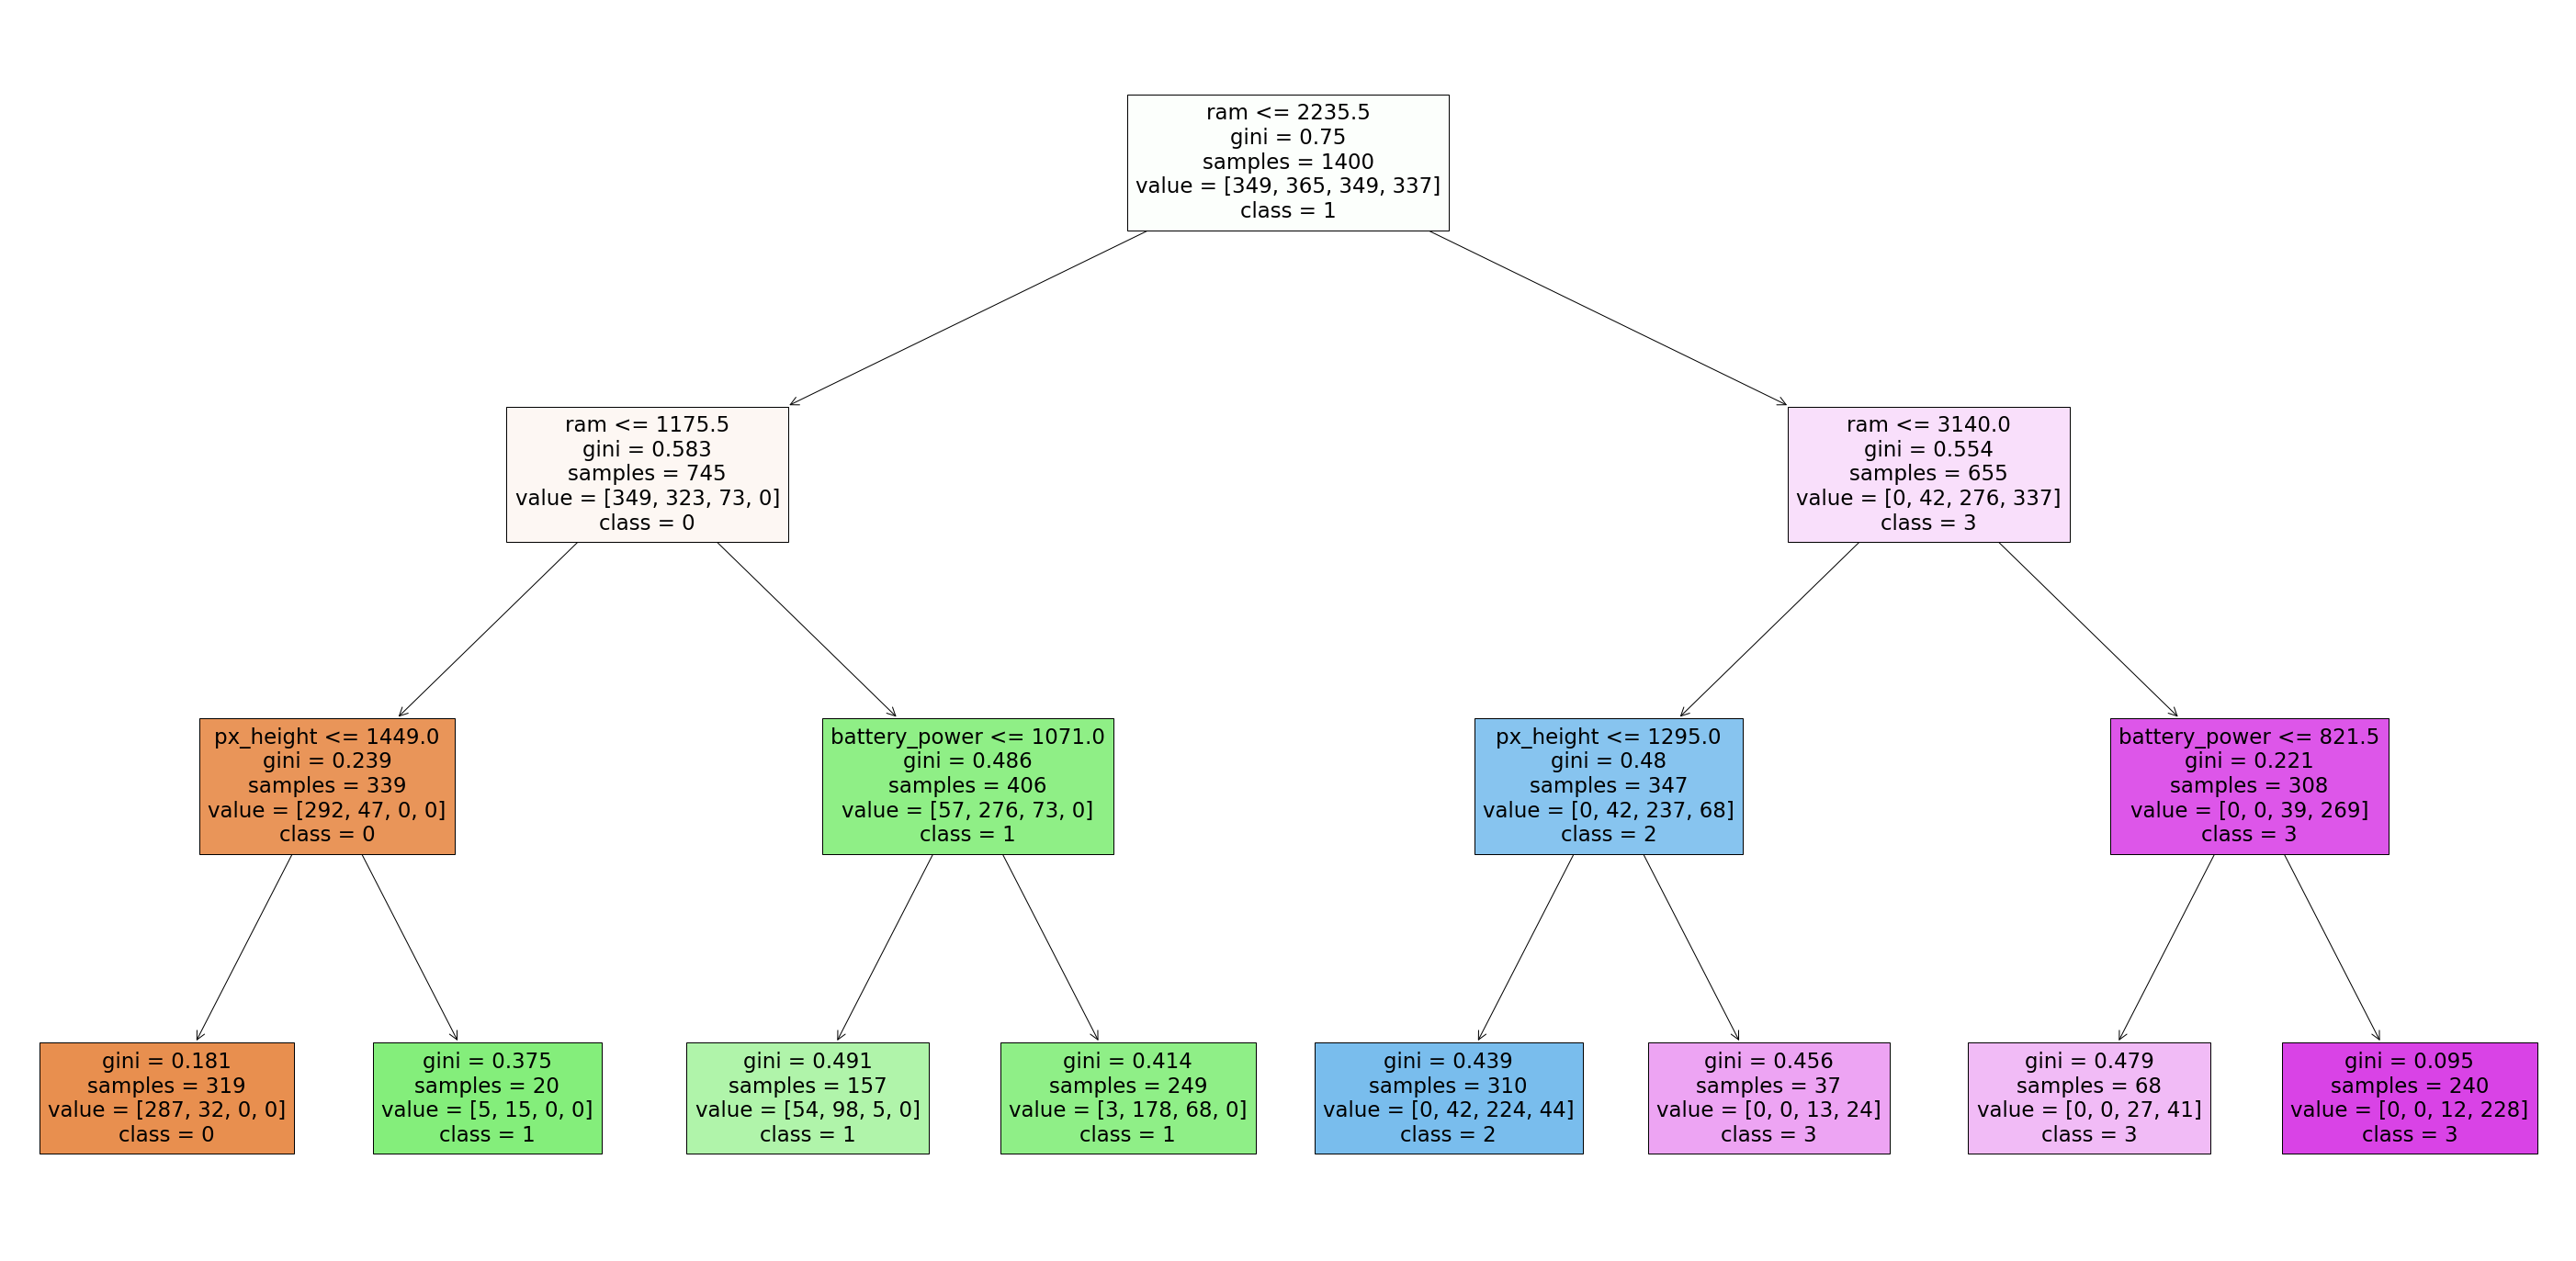

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Fit the decision tree classifier with max depth of 3
dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(50,25))
plot_tree(dtc, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)
plt.show()

**Interpreting the tree based model**

Here, we see 3 levels of the decision tree classifier. The tree is split from the root node on the basis of ram. 

On the first level, we see that gini of both nodes is lower than the root node gini, which is appropriate. Also, the samples are mostly evenly divided among the 2 nodes on the first level.

On the second level, we see that gini of both nodes is still lower than the root node gini, which is appropriate. Also, the samples are mostly evenly divided among the 4 nodes on the first level. Also, the second level actually contains all the classes of the target variable.

On the third level however, we see that gini score is uneven, and it even increased from the second level, which is not very good. Also, the samples are quite unevenly distributed on this level.

So overall, we can conclude that the decision tree is good uptill the second level depth.

In [24]:
# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the random forest classifier on the training data
rfc.fit(X_train, y_train)

# Get the feature importances
importances = rfc.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")

battery_power: 0.075
blue: 0.007
clock_speed: 0.029
dual_sim: 0.007
fc: 0.025
four_g: 0.006
int_memory: 0.040
m_dep: 0.025
mobile_wt: 0.039
n_cores: 0.022
pc: 0.029
px_height: 0.057
px_width: 0.059
ram: 0.478
sc_h: 0.026
sc_w: 0.028
talk_time: 0.032
three_g: 0.005
touch_screen: 0.006
wifi: 0.007


# Using AutoML to find the best model

In [25]:
# Converting Pandas Dataframe to H2O dataframe to proceed with AutoML
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
# Setting up the data split between training and test dataset
pct_rows = 0.80  
data_train, data_test = data.split_frame([pct_rows])

# Define the target variable and the predictor variables
y = 'price_range'
X = data.columns
X.remove(y)

# Initializing AutoML
run_time = 600
aml = H2OAutoML(max_models=10, max_runtime_secs=run_time, seed=1) 

# Training the train data on various models
aml.train(x=X, y=y, training_frame=data_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230324_233514


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  9/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.010713717173238648
RMSE: 0.10350708755075011
MAE: 0.08427961591873058
RMSLE: 0.060223522630131525
Mean Residual Deviance: 0.010713717173238648
R^2: 0.991377076557623
Null degrees of freedom: 1611
Residual degrees of freedom: 1602
Null deviance: 2002.860421836259
Residual deviance: 17.2705120832607
AIC: -2715.7455410892317

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.07360143622991283
RMSE: 0.2712958463189454
MAE: 0.20596768362792636
RMSLE: 0.1368947768774833
Mean Residual Deviance: 0.07360143622991283
R^2: 0.9407619652827105
Null degrees of freedom: 1611
Residual degrees of freedom: 1601
Null deviance: 2008.4229393931298
Residual deviance: 118.64551520261949
AIC: 392.80355906761923

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.205923   0.0174291  0.22058       0.206227      0.210183      0.176346      0.21628
mean_residual_deviance  0.0734936  0.011396   0.082593      0.0728503     0.0765502     0.0543089     0.0811658
mse                     0.0734936  0.011396   0.082593      0.0728503     0.0765502     0.0543089     0.0811658
null_deviance           401.685    11.2448    391.739       418.877       394.901       395.746       407.16
r2                      0.940465   0.0097909  0.932632      0.943805      0.934499      0.956198      0.93519
residual_deviance       23.7153    3.80893    26.3472       23.5307       25.185        17.2159       26.2977
rmse                    0.270383   0.0219887  0.28739       0.269908      0.276677      0.233043      0.284896
rmsle                   0.136497   0.0111179  0.149945      0.13288       0.13118       0.122793      0.145686

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [27]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230324_233514     0.271296  0.0736014  0.205968  0.136895                 0.0736014
StackedEnsemble_BestOfFamily_1_AutoML_1_20230324_233514  0.273703  0.0749132  0.20838   0.13838                  0.0749132
GBM_4_AutoML_1_20230324_233514                           0.288478  0.0832194  0.220543  0.148165                 0.0832194
GBM_3_AutoML_1_20230324_233514                           0.290156  0.0841902  0.219793  0.147876                 0.0841902
GBM_2_AutoML_1_20230324_233514                           0.293361  0.0860606  0.224922  0.149763                 0.0860606
GBM_1_AutoML_1_20230324_233514                           0.294866  0.0869457  0.242338  0.155549                 0.0869457
XGBoost_3_AutoML_1_20230324_233514                       0.305612  0.0933989  0.227702  0.151529                 0.0933989
XGBoost_2_AutoML

In [28]:
from sklearn.metrics import r2_score

# Get the leaderboard
leaderboard = aml.leaderboard

# Iterate through the models and compute R^2 scores
for i in range(leaderboard.nrows):
    model_id = leaderboard[i, "model_id"]
    model = h2o.get_model(model_id)
    predictions = model.predict(data_test).as_data_frame()
    true_values = data_test[y].as_data_frame()
    r2 = r2_score(true_values, predictions)
    print(f"Model {model_id}: R^2 score = {r2:.4f}")

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Model StackedEnsemble_AllModels_1_AutoML_1_20230324_233514: R^2 score = 0.9485
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Model StackedEnsemble_BestOfFamily_1_AutoML_1_20230324_233514: R^2 score = 0.9474
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_4_AutoML_1_20230324_233514: R^2 score = 0.9415
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_3_AutoML_1_20230324_233514: R^2 score = 0.9418
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_2_AutoML_1_20230324_233514: R^2 score = 0.9438
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model GBM_1_AutoML_1_20230324_233514: R^2 score = 0.9347
xgboost prediction progress: |███████████

# Interpreting the result of AutoML leaderboard

As we can see, that Stacked Ensemble is the model with the highest R Squared score. But we will use GBM_3_AutoML_1_20230324_232603, because it is the highest R squared model that fully supports the SHAP analysis.

# SHAP Analysis and Partial Dependence Plot for the best AutoML model.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

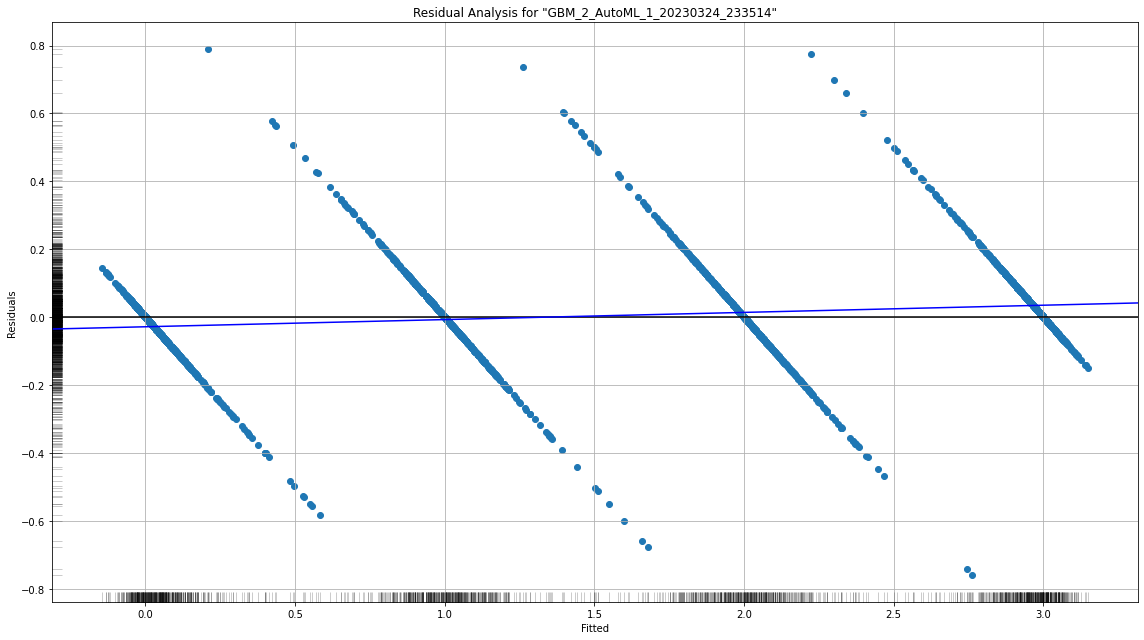

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

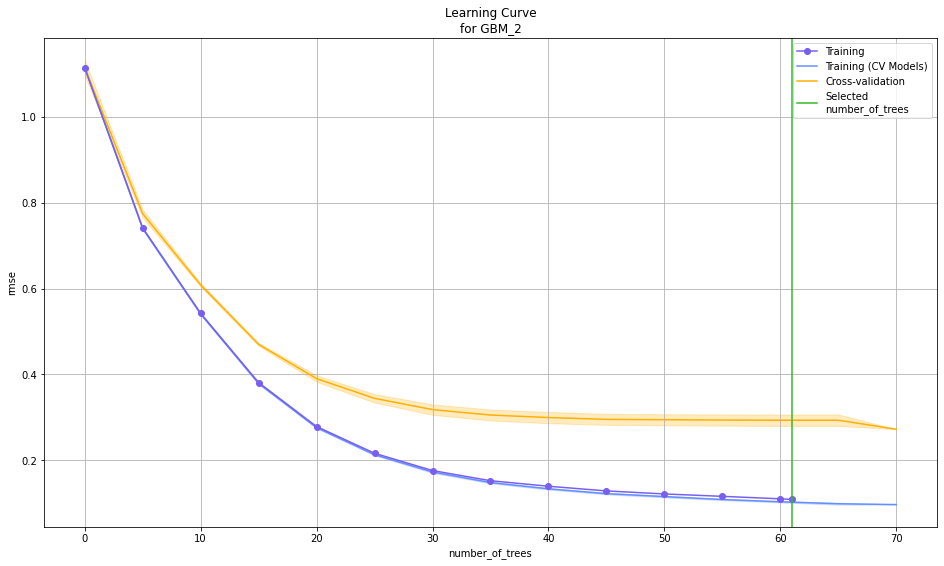

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

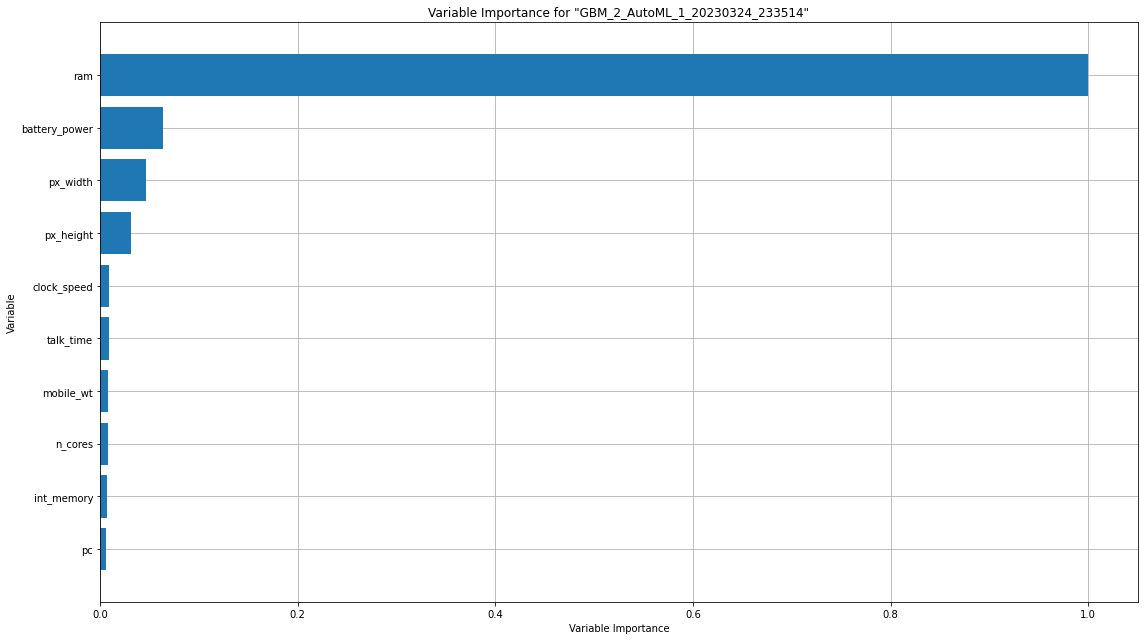

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

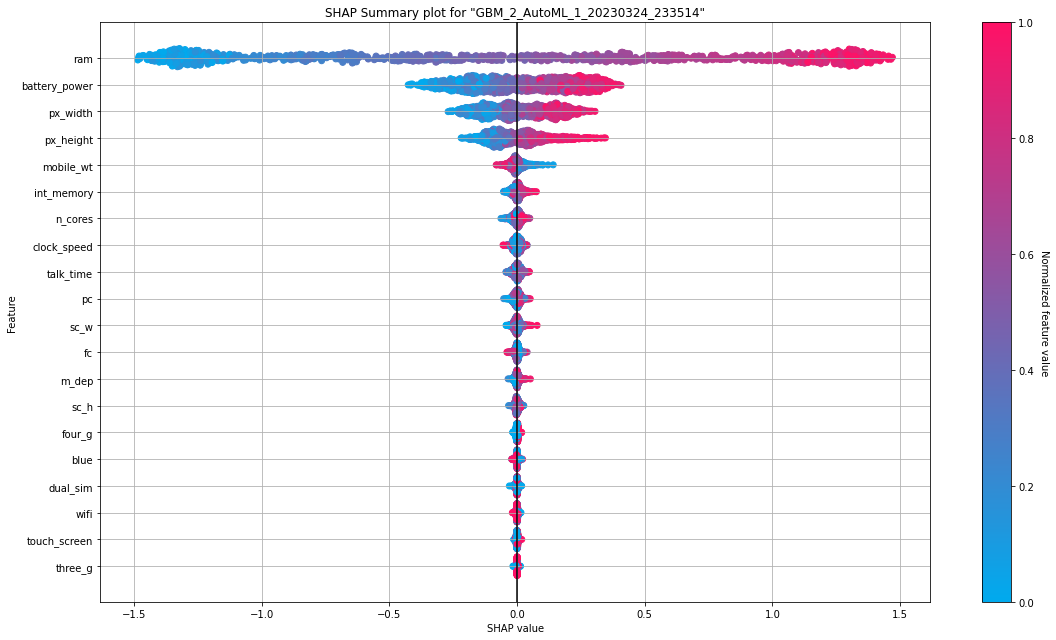

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

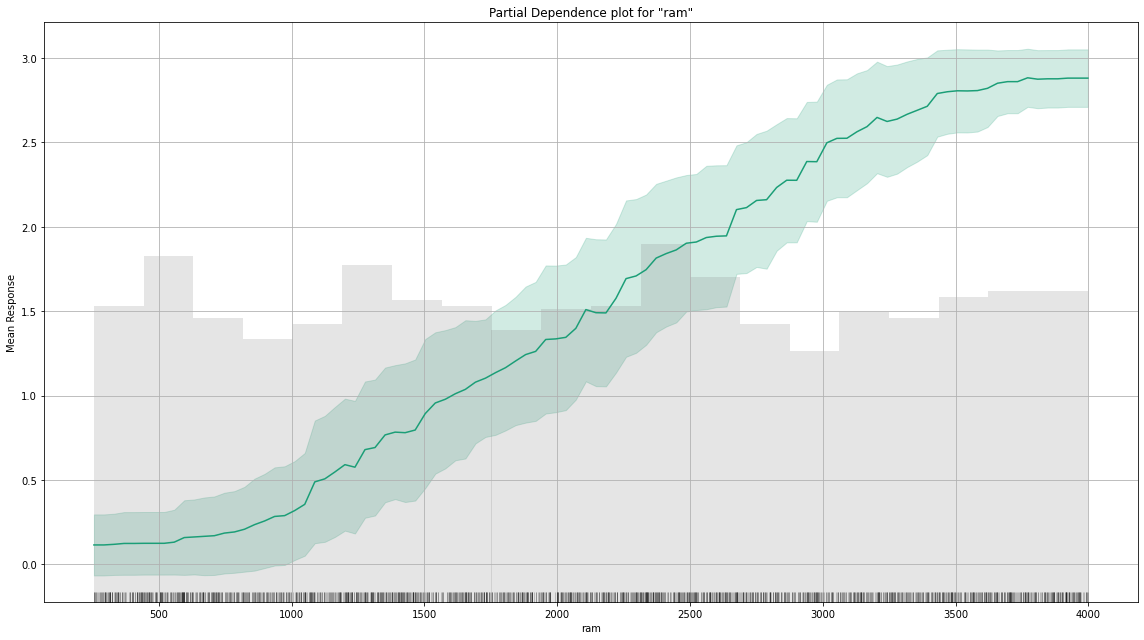

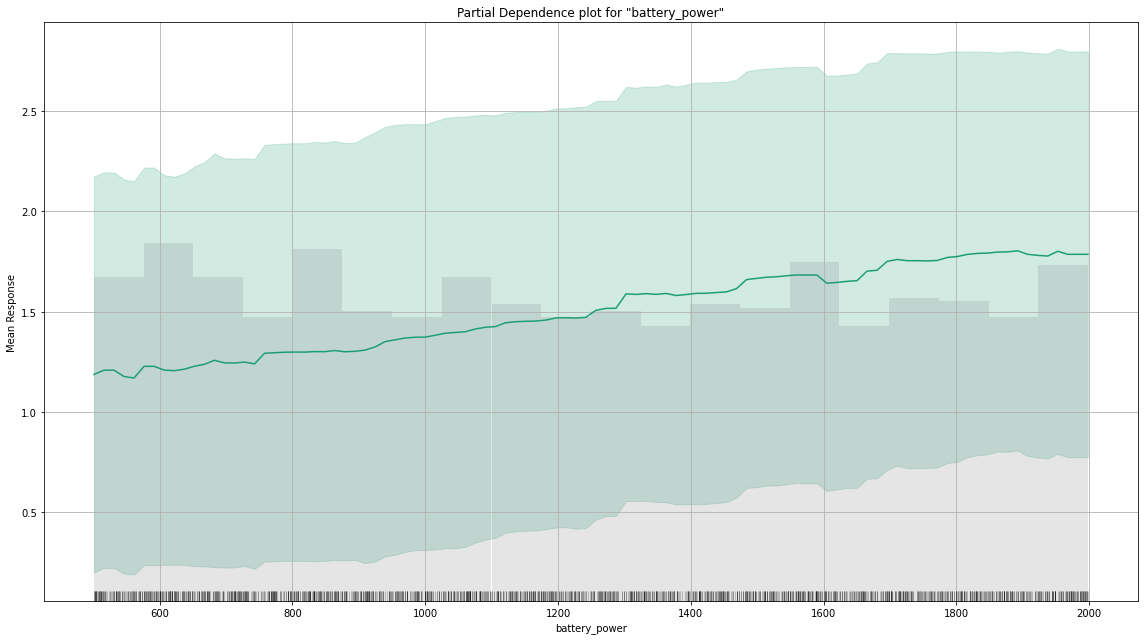

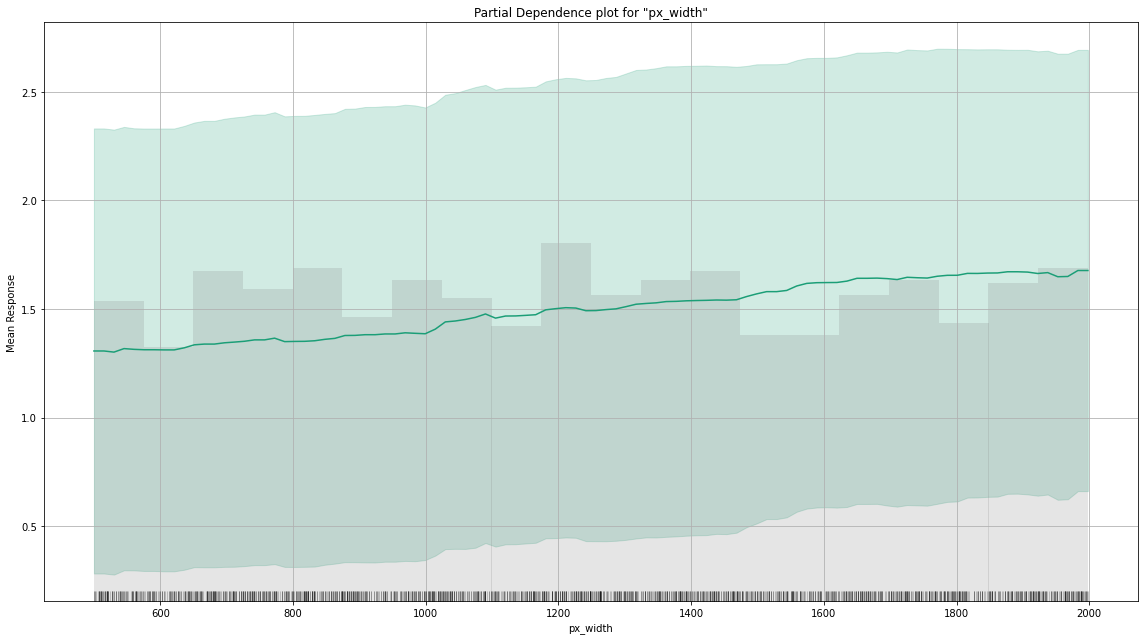

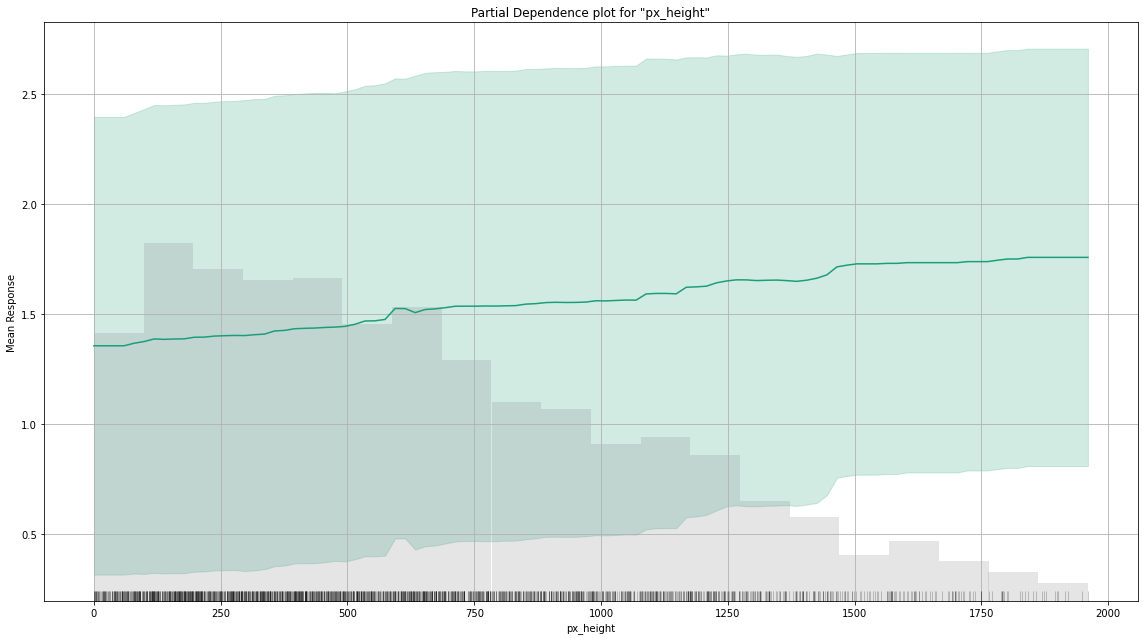

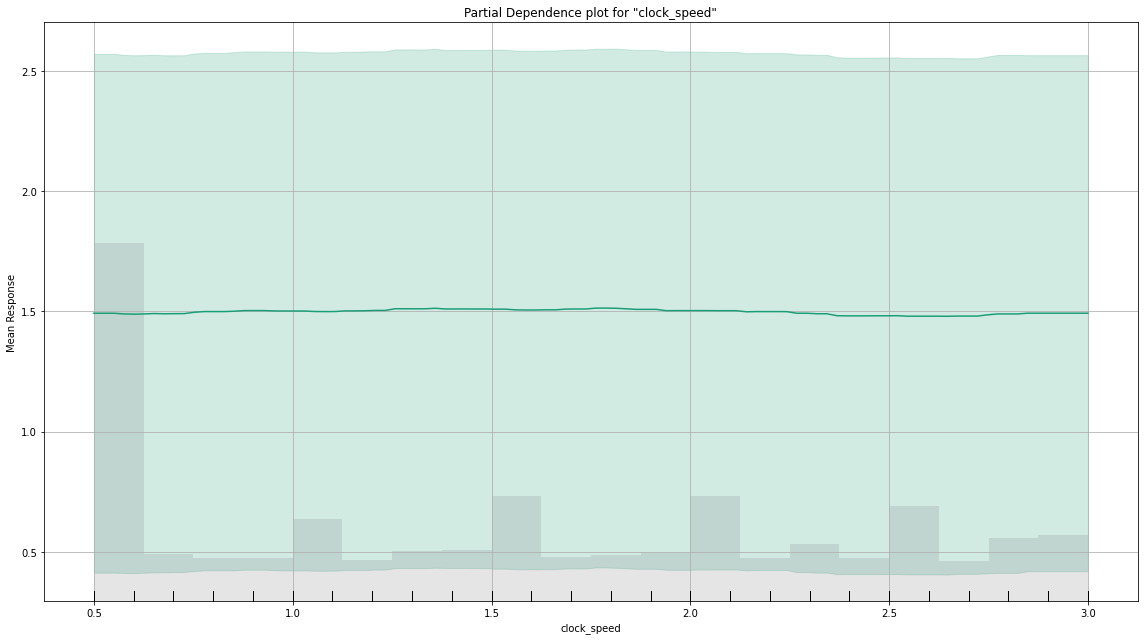

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

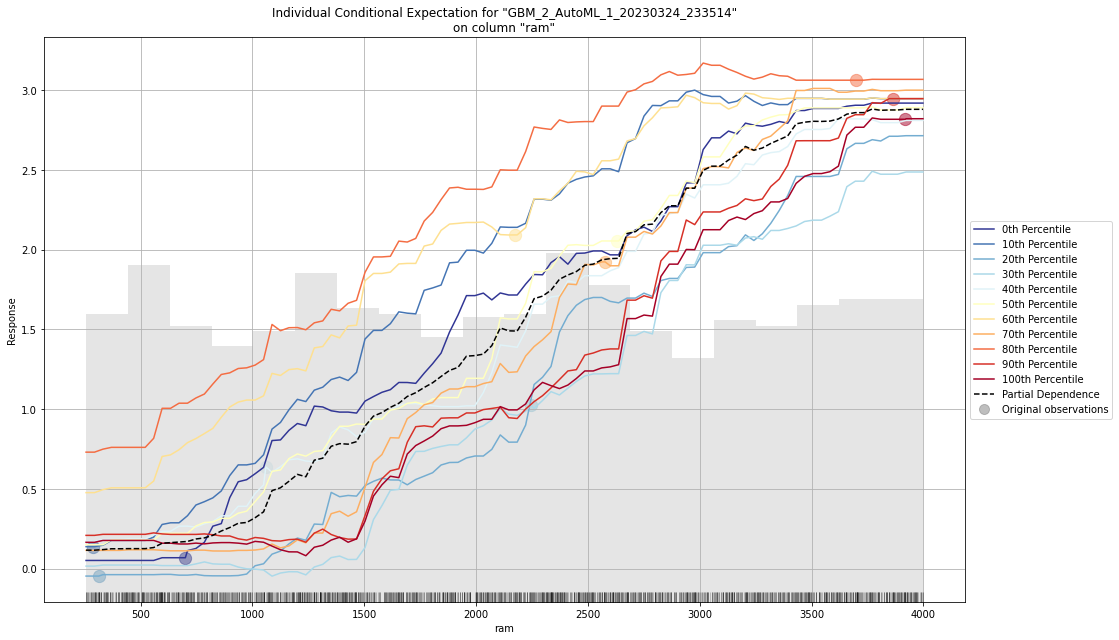

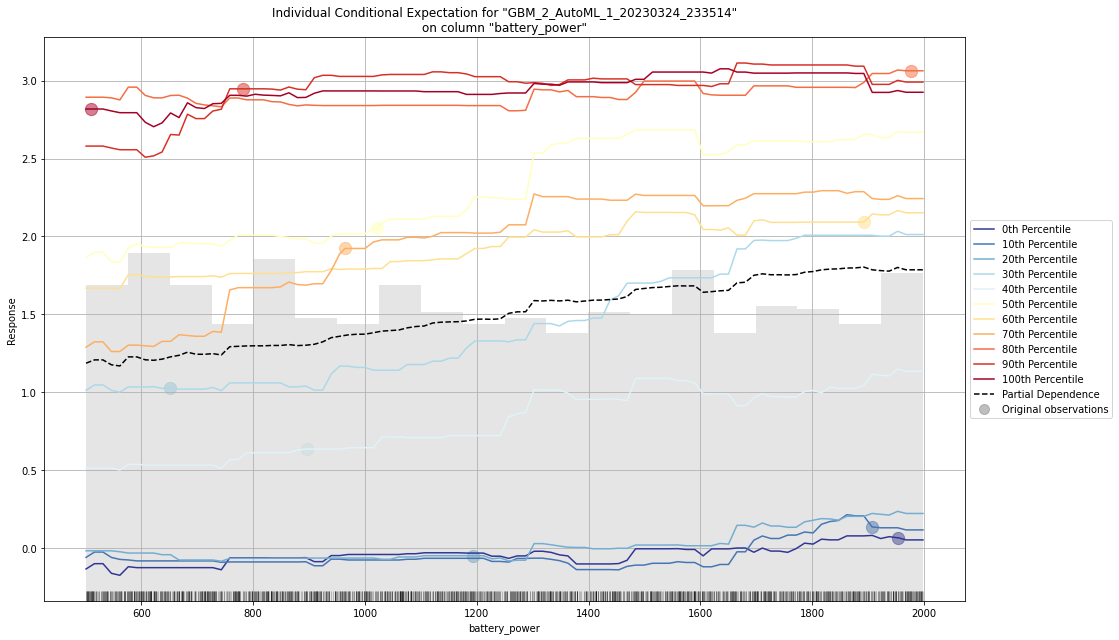

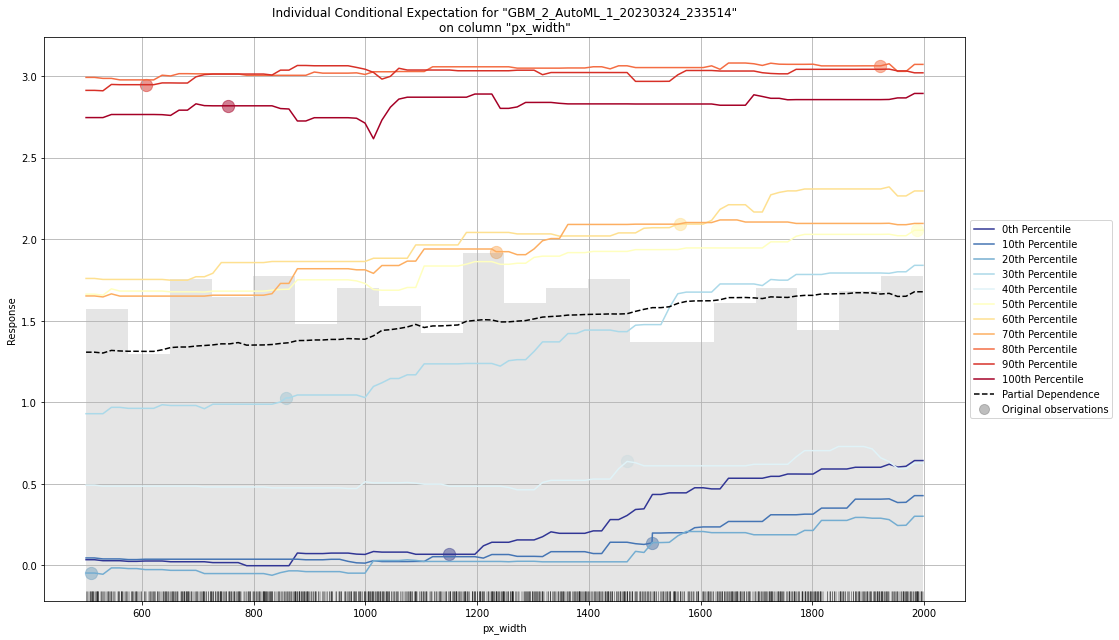

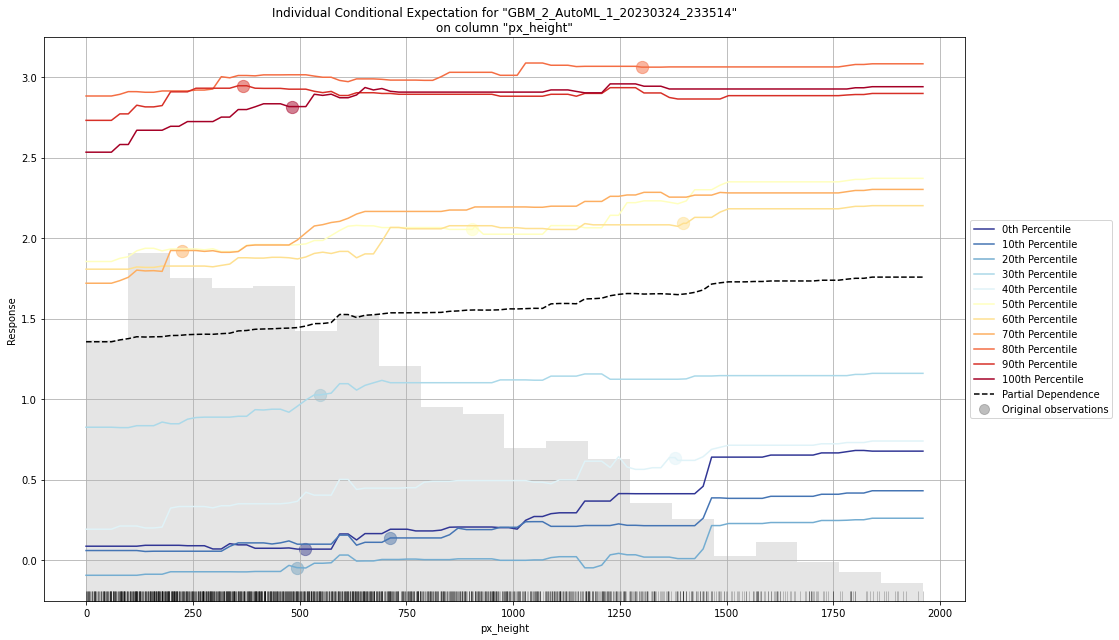

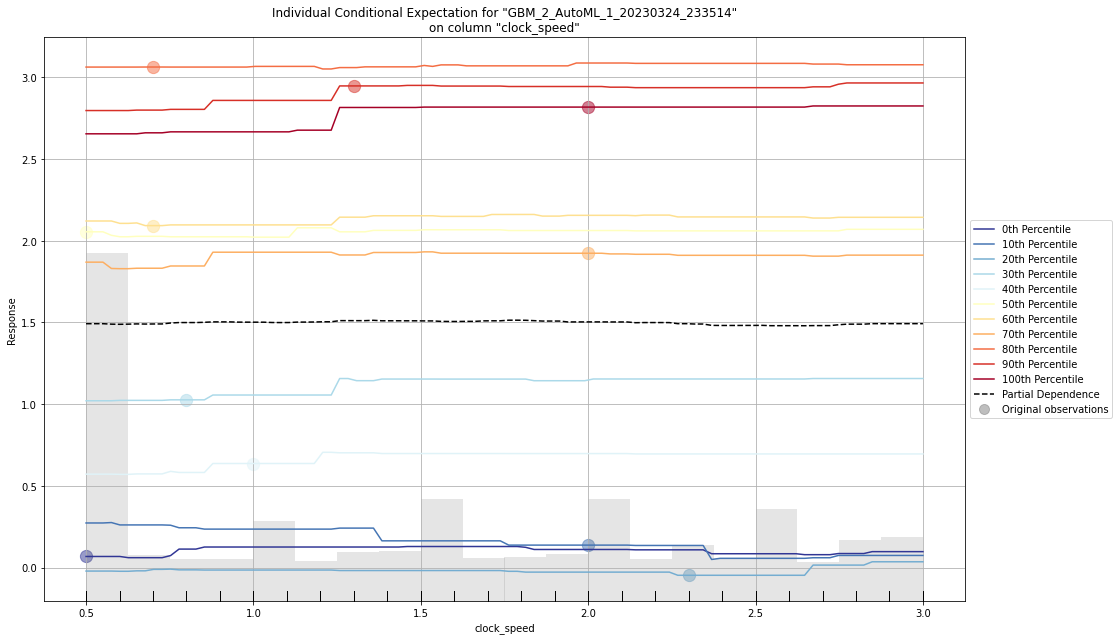

In [31]:
# Retrieve the GBM model
model_id = "GBM_2_AutoML_1_20230324_233514"
model = h2o.get_model(model_id)

# generate SHAP values to interpret the model's predictions
shap_values = model.explain(data)

# Analysis of the best AutoML model

**Residual Analysis**

As we can see in our residual analysis plot, that there is the presence of some striped lines across the plot.

Striped lines may suggest that the model is better at predicting some values better than others, which could be an indication that the model needs to be improved or that there are other variables that need to be included in the model.

**Learning Curve Plot**

Based on the learning curve plot, we see that the cross validation curve has a higher mse, which suggests that the model may be well set on the training data, but not exactly performing well on new data, and so it might be overfitting.

It might be solved by adding a more complex model or introducing some new features, which might help mitigate the problem of overfitting.

**Variable Importance plot**

As the heading of the variqable importance plot itself says, it shows the relative importance of the most important variables in the model.

Ans from the plot, we can see that the most important variable is ram, which means that it has the most significant impact on the likelihood of the target variale classes. AFter ram, quite a few variables are in order:-

1. ram
2. battery_power
3. px_width
4. px_height
5. clock_speed
6. talk_time
7. mobile_wt
8. n_cores
9. int_memory
10. pc

**Shap Summary Plot**

As we can see from the shap summary plot above, we can see that the features are arranged in the order of importance from up to down.

ram, batery_power, px_width, px_height have the most spread of Shapley values, which makes them the most important features; the higher the ram/battery_power/px_width/px_height, the higher the Shapley value and therefore the higher predicted price_range class.

**Partial Dependence Plot**

The partial dependency plot shows the response of the target variable with respect to the change in the predictor variable, while keeping all the other variables constant. Here we are gonna take a look at 2 of them, ram, and battery_power:-

1. ram: From the plot, we can see that the biggest change in the mean response happens in the range of 2500-3000. So we can interpret that this range of the predictor variable ram is the most important for the target variable.

2. battery_power: From the plot, we can see that the biggest change in the mean response happens in the range of 1200-1600. So we can interpret that this range of the predictor variable ram is the most important for the target variable.

**Individual Condition Expectation Plot**

ICE plots show us a detailed overview of the effect of predictor feature on the target, by showing it for every instance, instead of just one, like PDP.

So in our case, for ram, we saw that the big jump in response was in the range 2500-3000. But in ICE plot, we can see that some percentiles respond to that range, while others don't.

It is even more evident in the case of battery_power, which shows that almost all the percentiles are almost linear like.

So, in conclusion, we can say that ICE plots are even more important than PDP if we want to fully understand the effects of the features on the output.

# SHAP Analysis for Linear and Tree based models

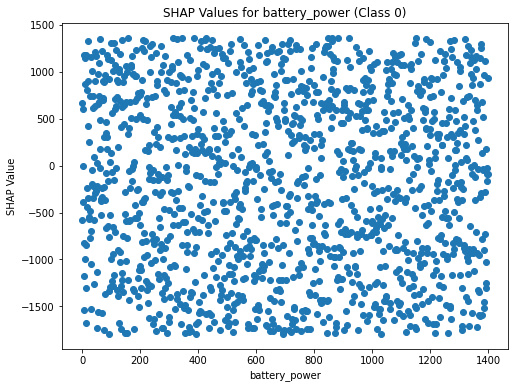

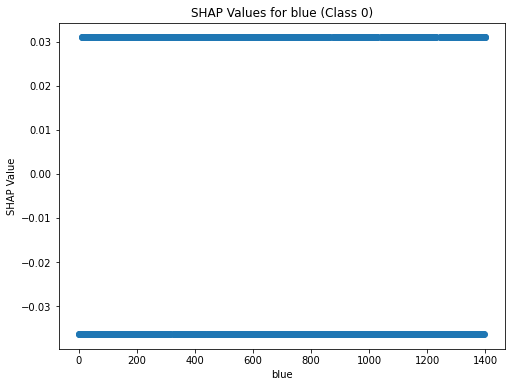

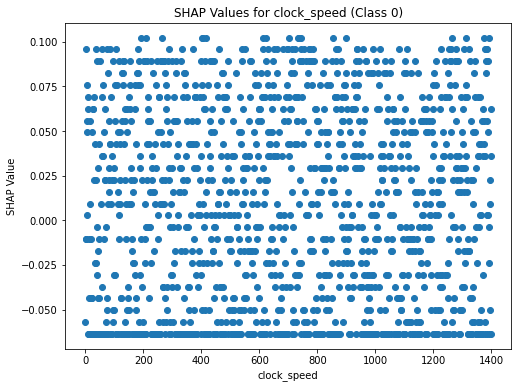

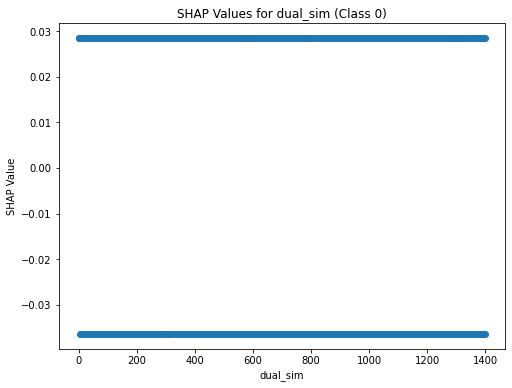

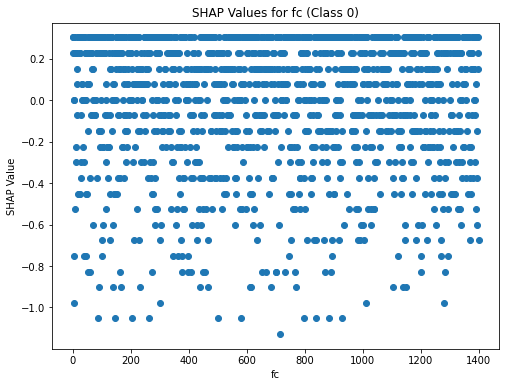

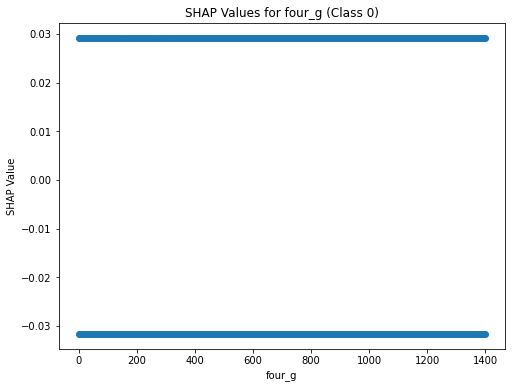

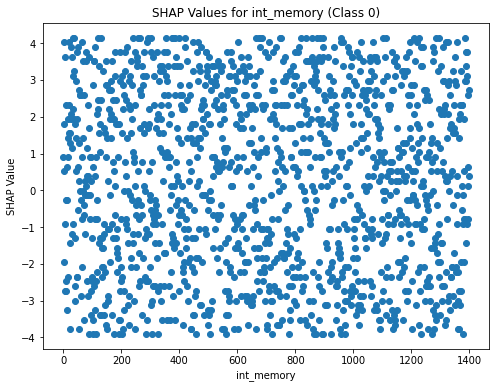

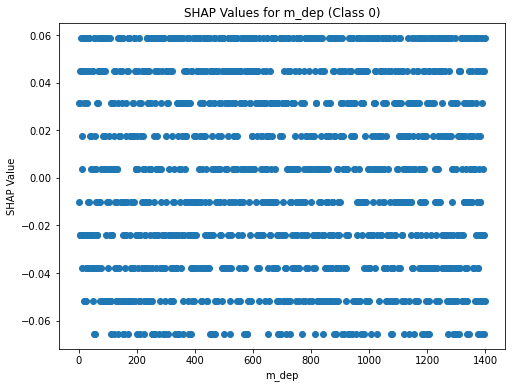

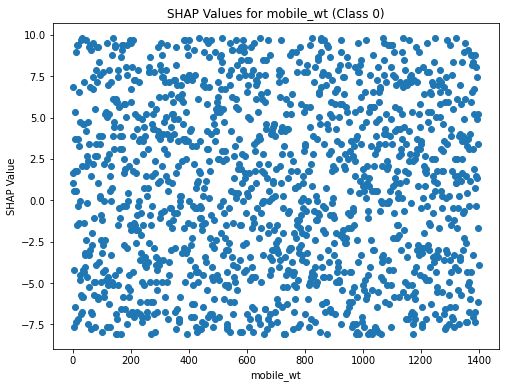

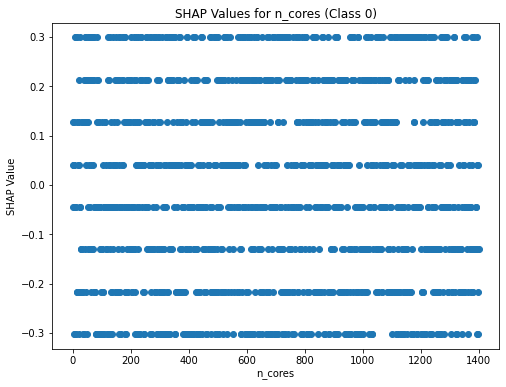

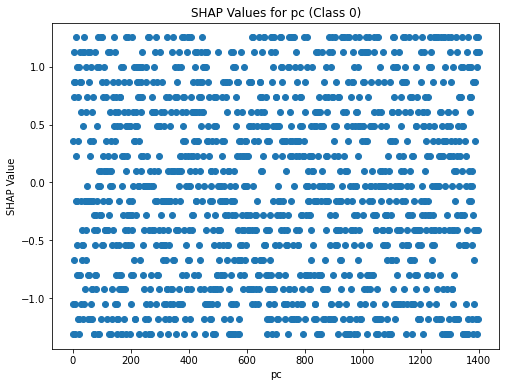

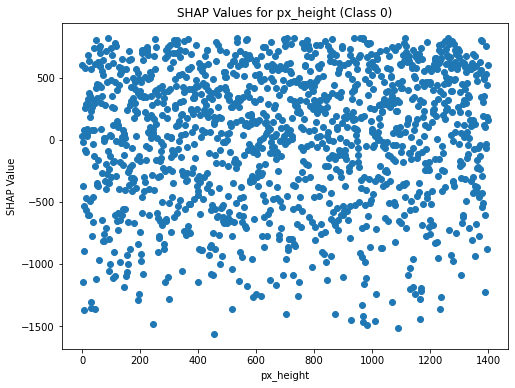

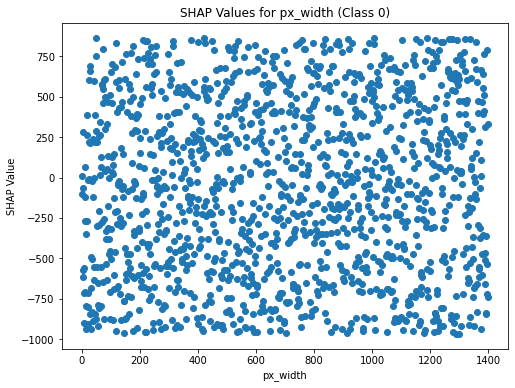

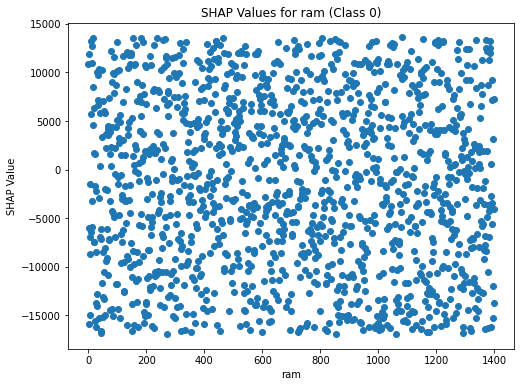

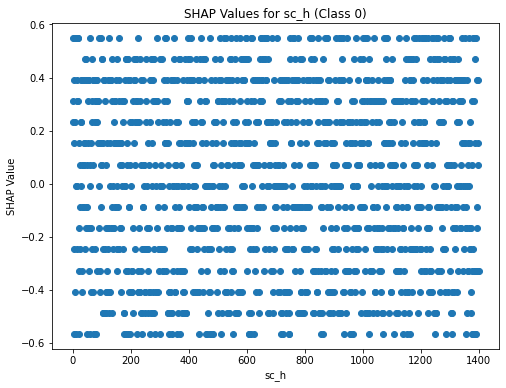

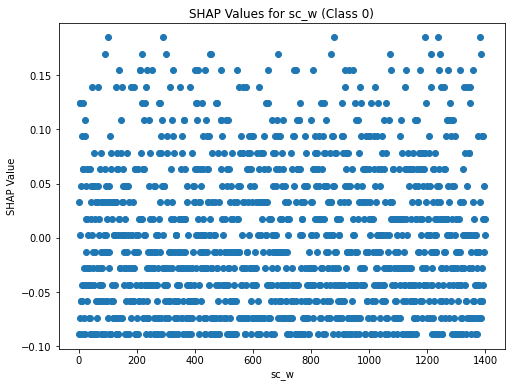

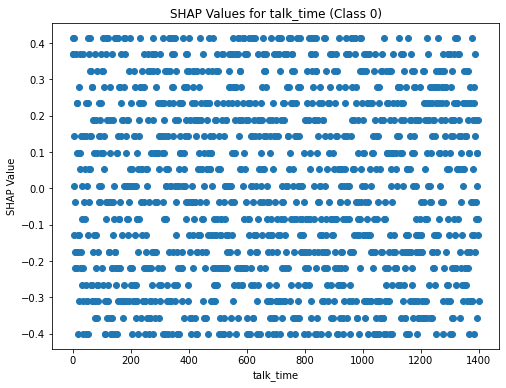

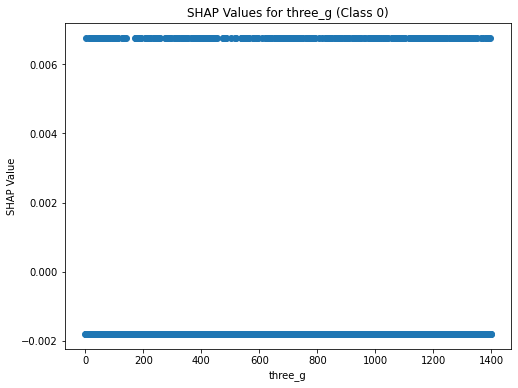

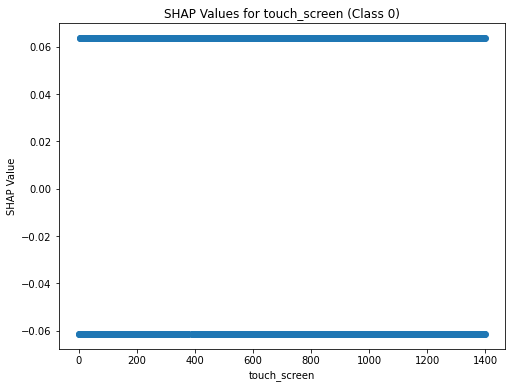

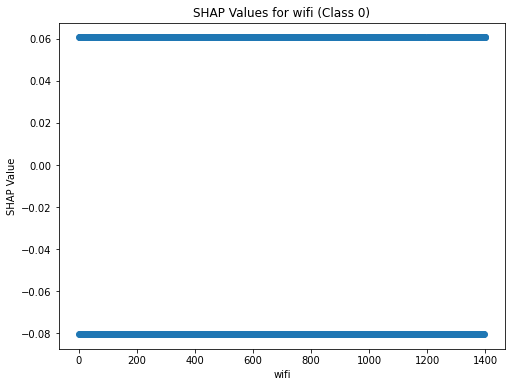

In [32]:

import matplotlib.pyplot as plt

# SHAP explanation of a Linear Model
linear_explainer = shap.LinearExplainer(logreg, X_train)
linear_shap_values = linear_explainer(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Choose the class index (0 for the first class)
class_index = 0

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), linear_shap_values.values[:, i, class_index])
    plt.xlabel(feature_name)
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()



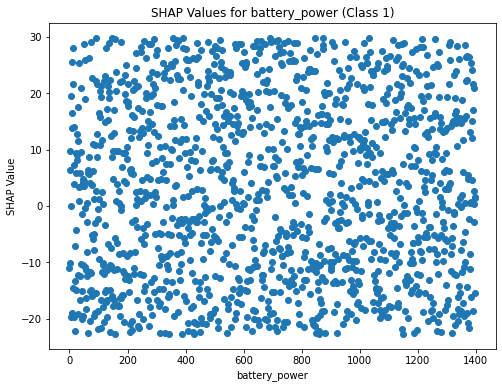

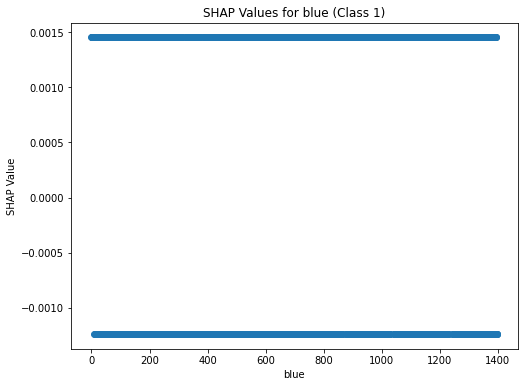

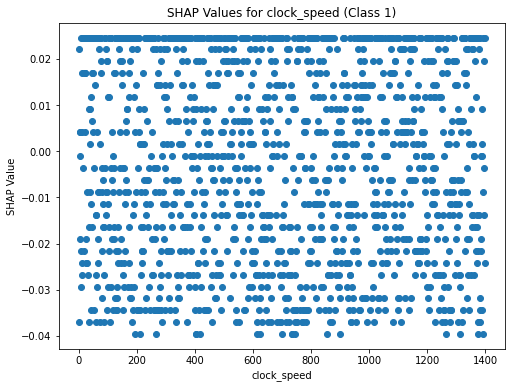

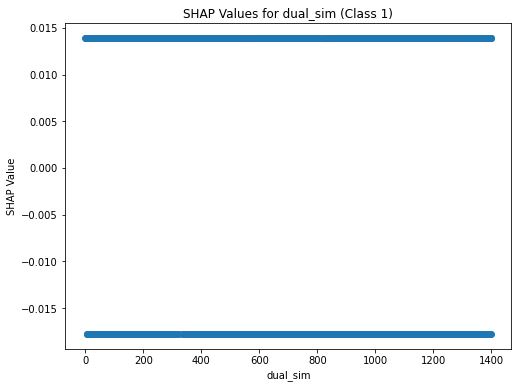

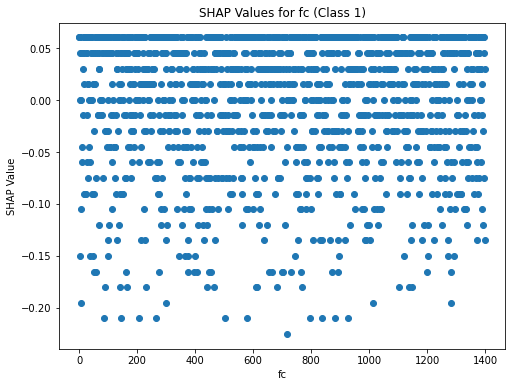

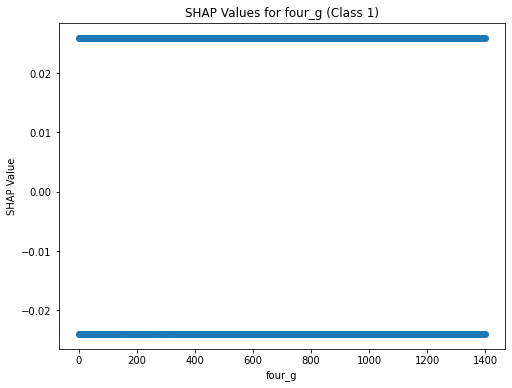

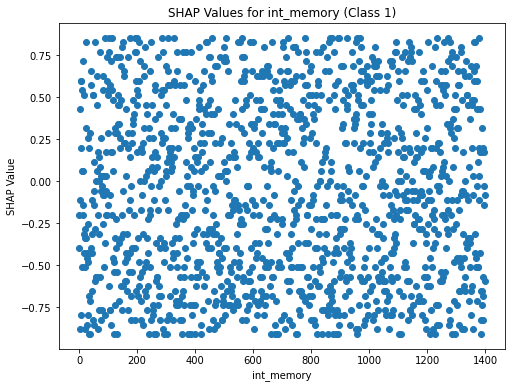

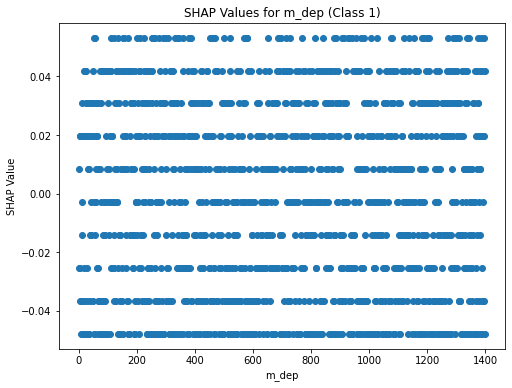

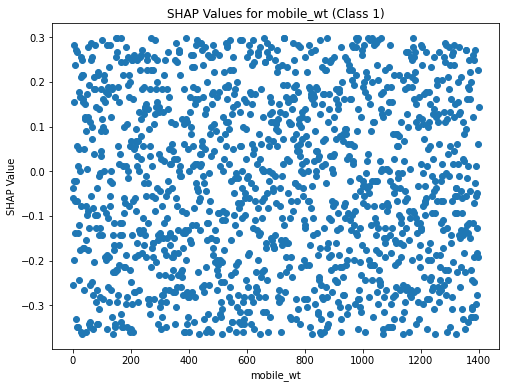

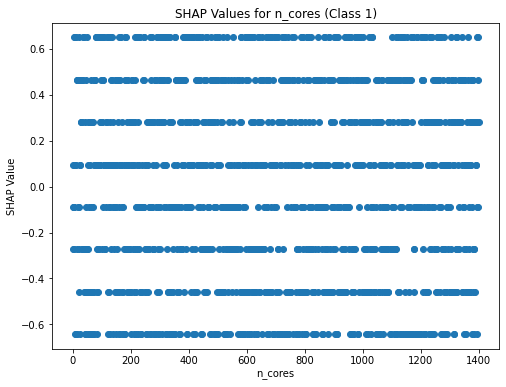

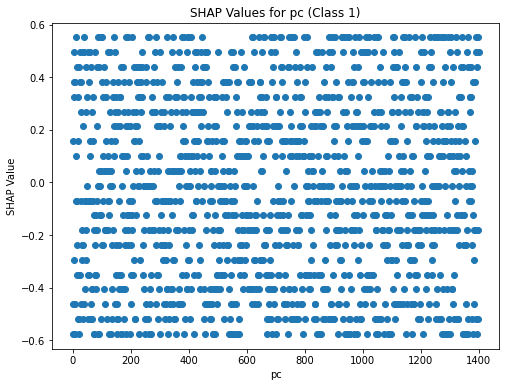

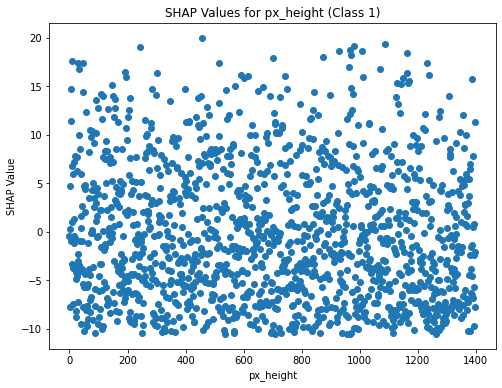

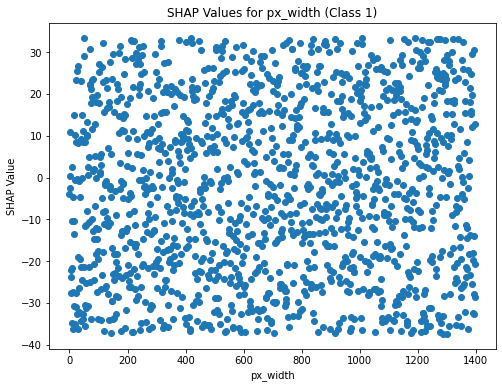

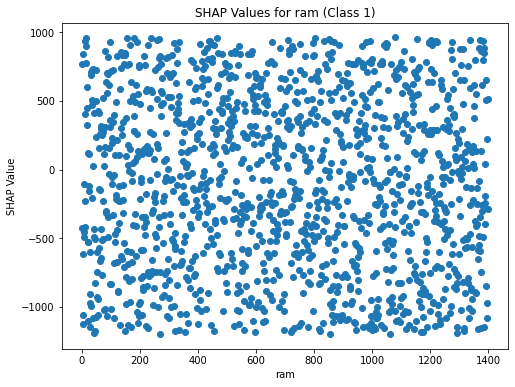

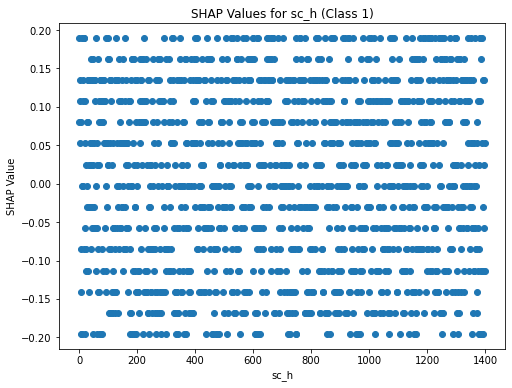

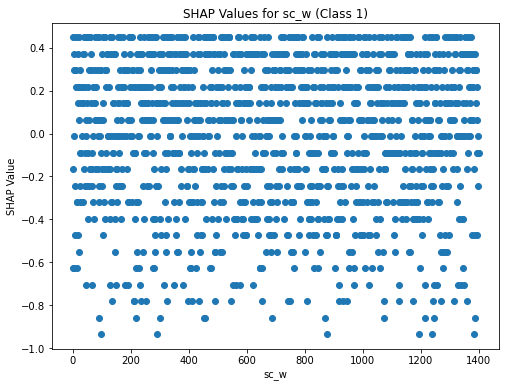

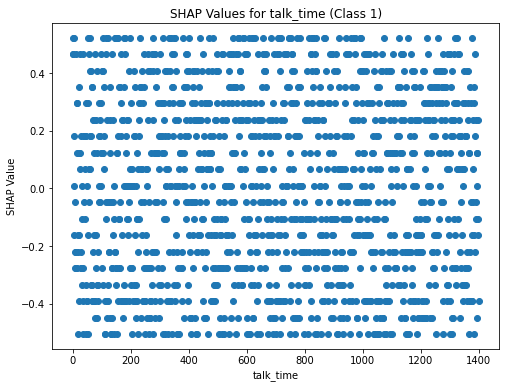

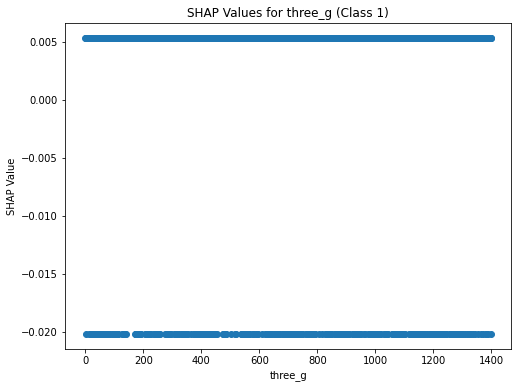

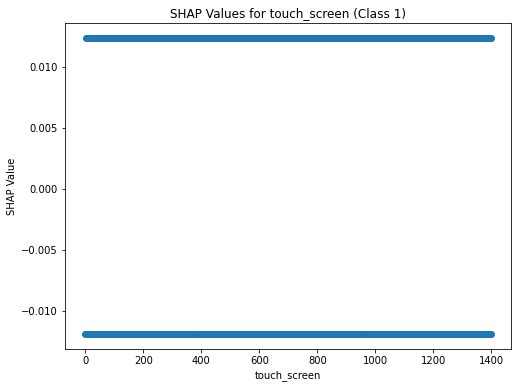

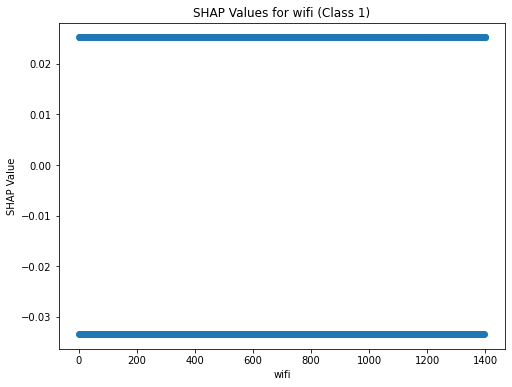

In [33]:
import matplotlib.pyplot as plt

# SHAP explanation of a Linear Model
linear_explainer = shap.LinearExplainer(logreg, X_train)
linear_shap_values = linear_explainer(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Choose the class index
class_index = 1

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), linear_shap_values.values[:, i, class_index])
    plt.xlabel(feature_name)
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()


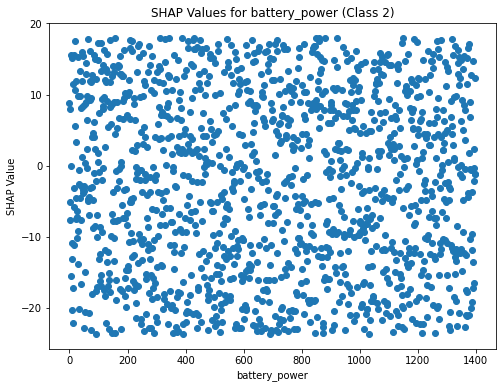

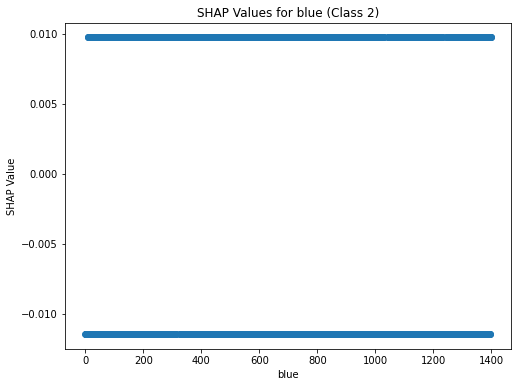

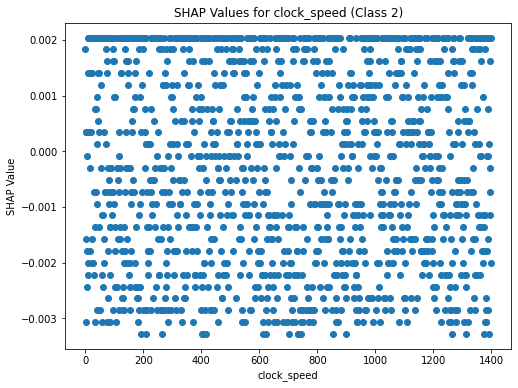

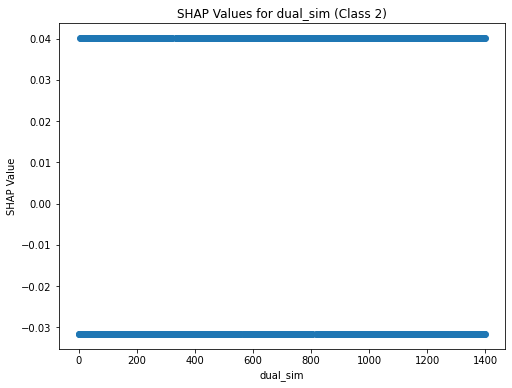

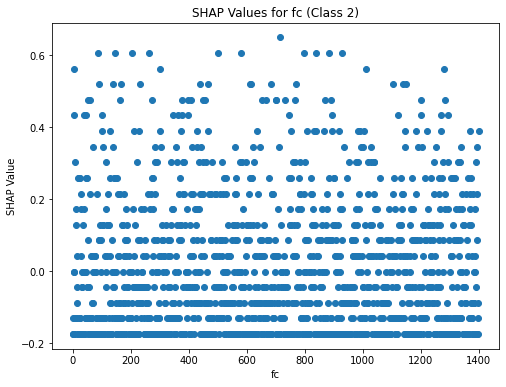

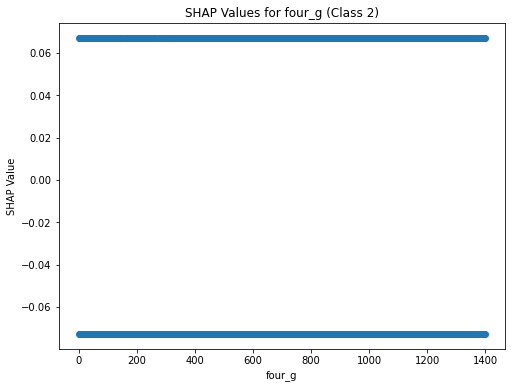

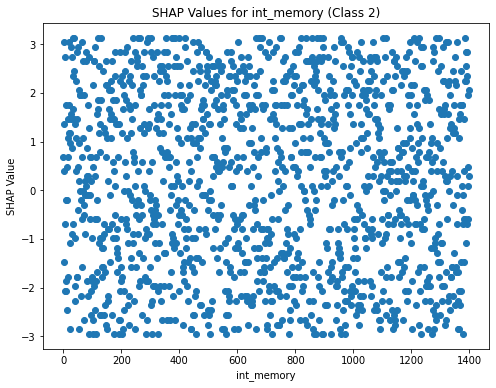

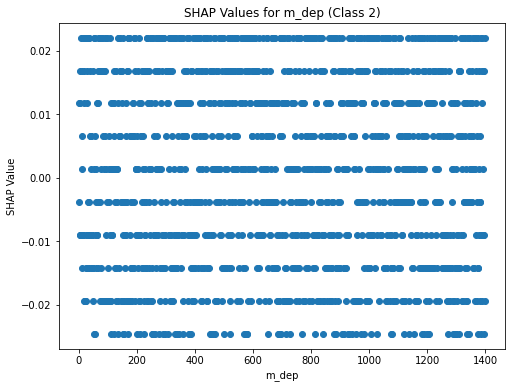

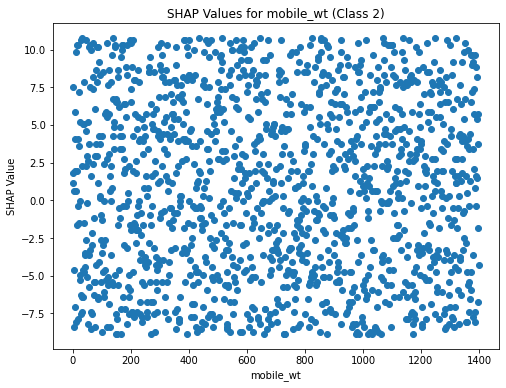

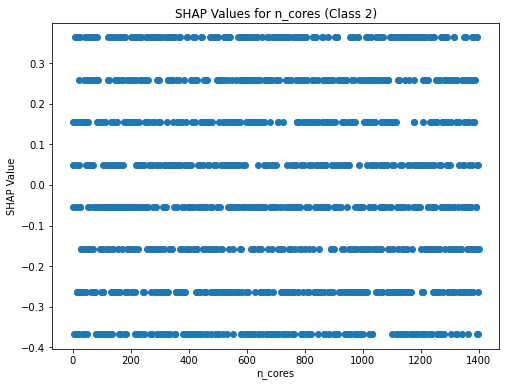

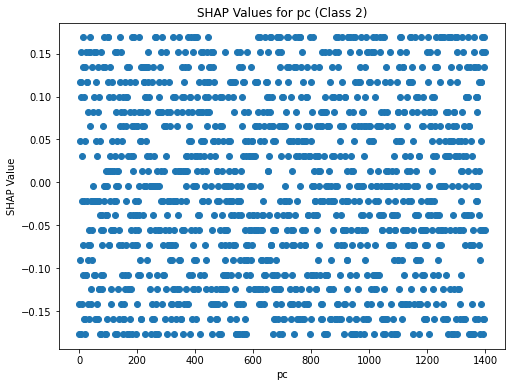

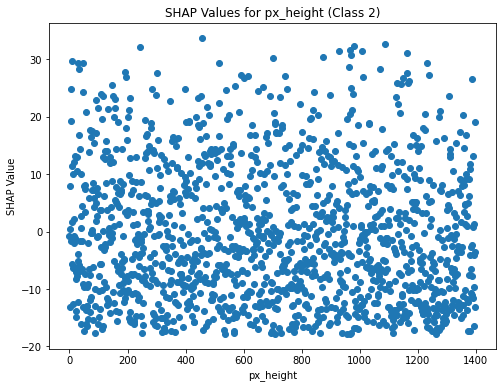

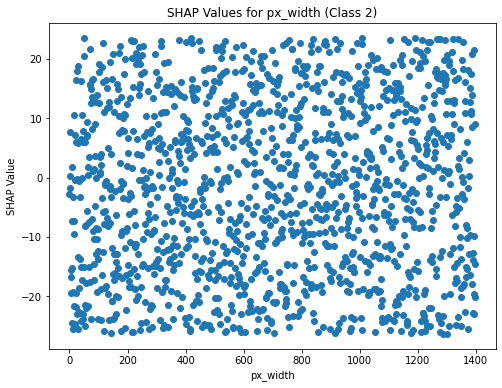

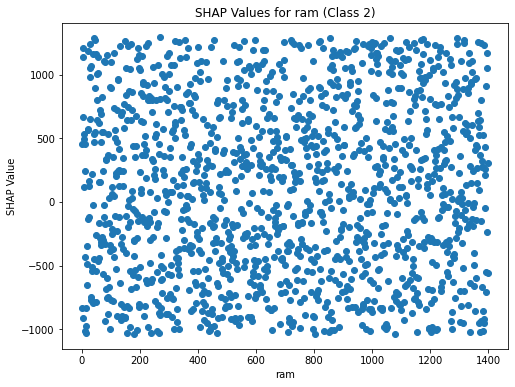

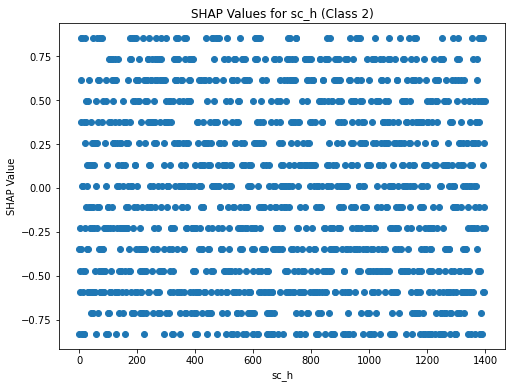

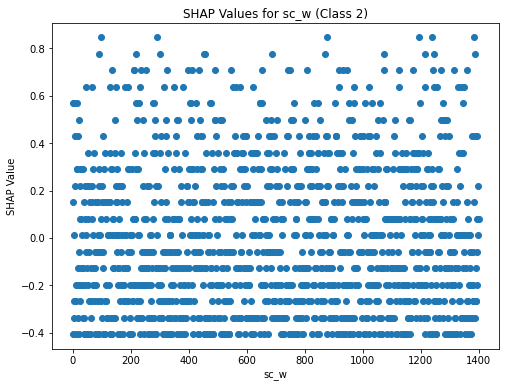

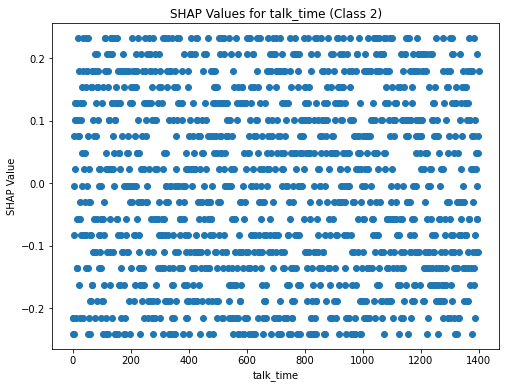

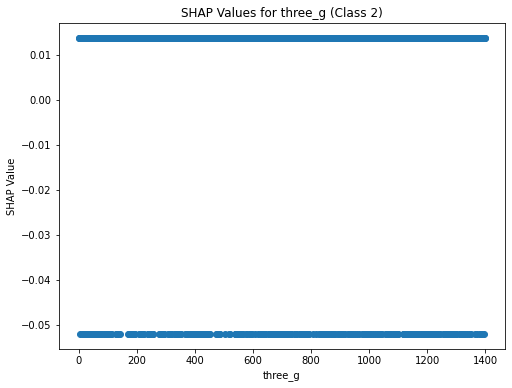

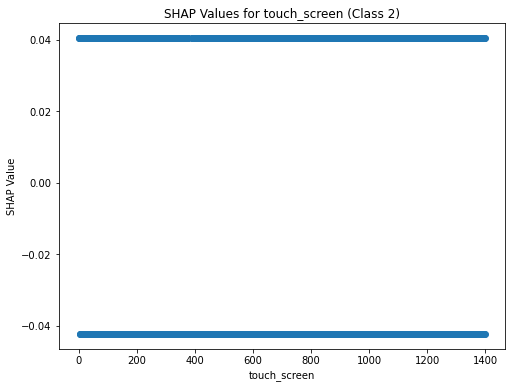

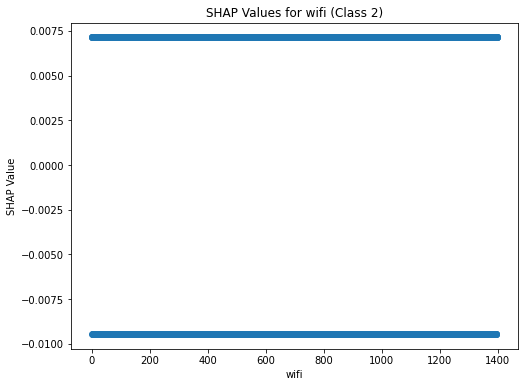

In [34]:
import matplotlib.pyplot as plt

# SHAP explanation of a Linear Model
linear_explainer = shap.LinearExplainer(logreg, X_train)
linear_shap_values = linear_explainer(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Choose the class index
class_index = 2

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), linear_shap_values.values[:, i, class_index])
    plt.xlabel(feature_name)
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()

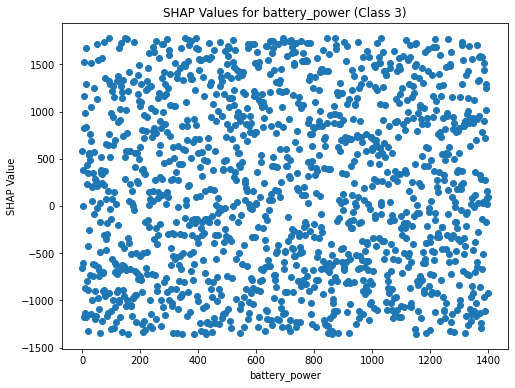

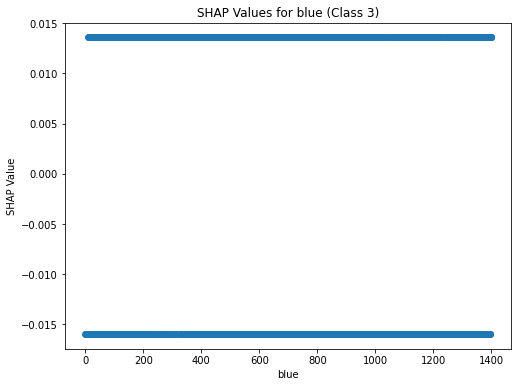

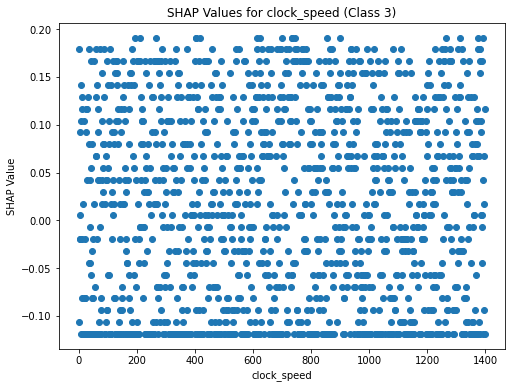

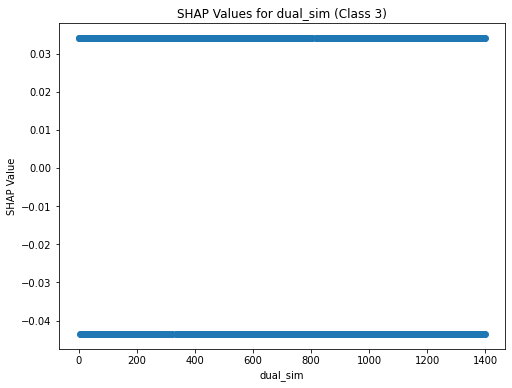

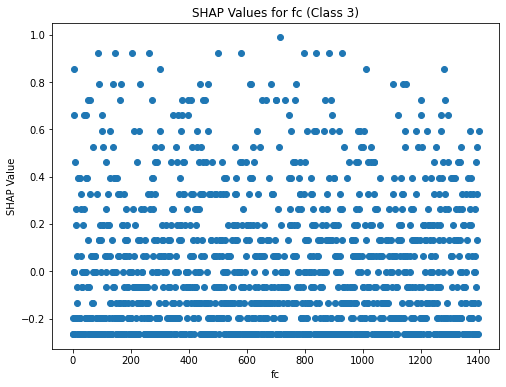

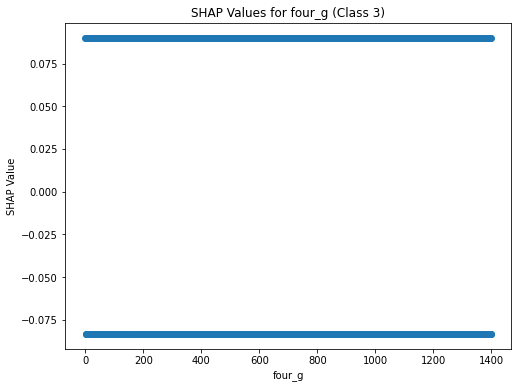

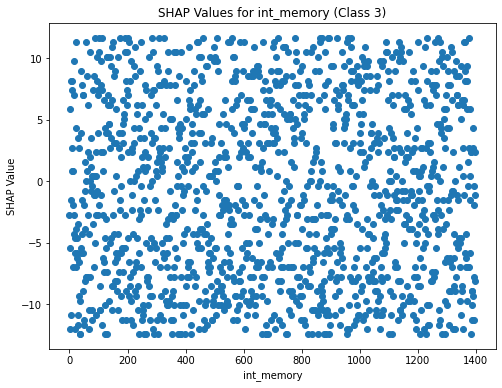

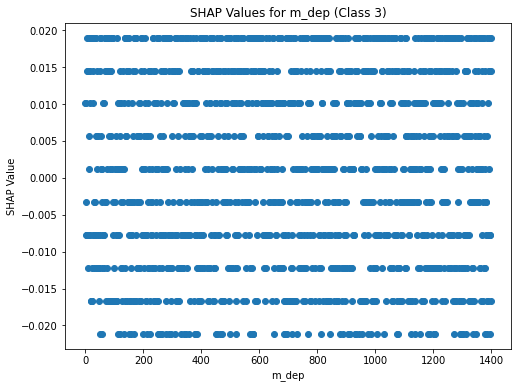

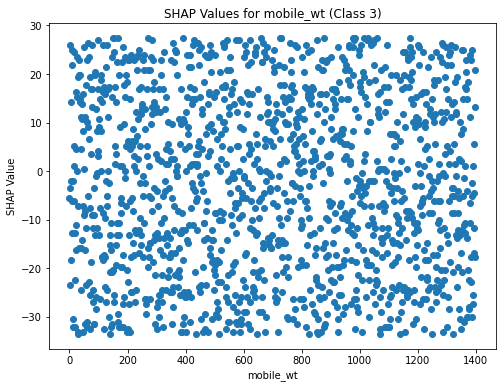

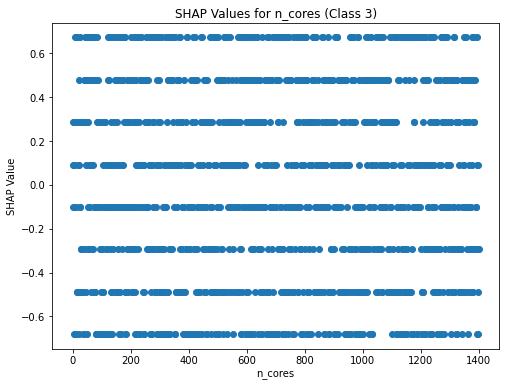

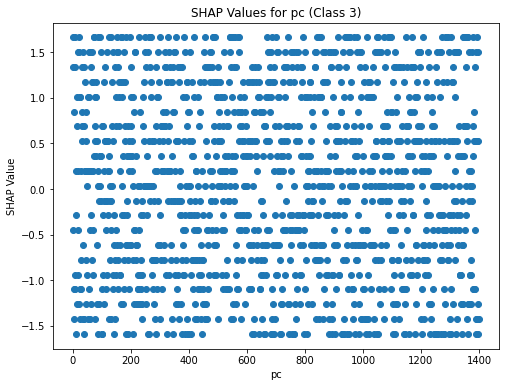

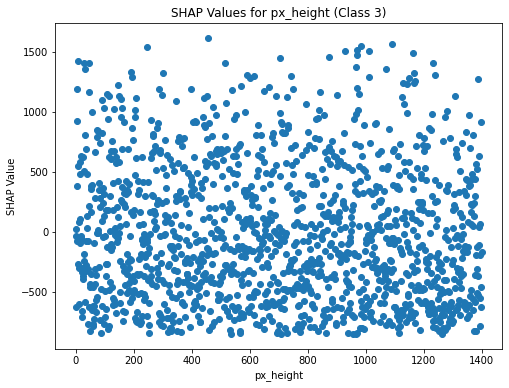

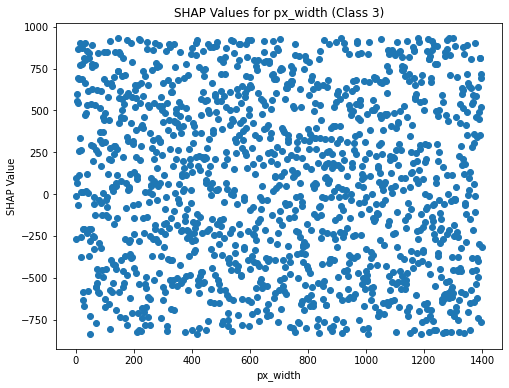

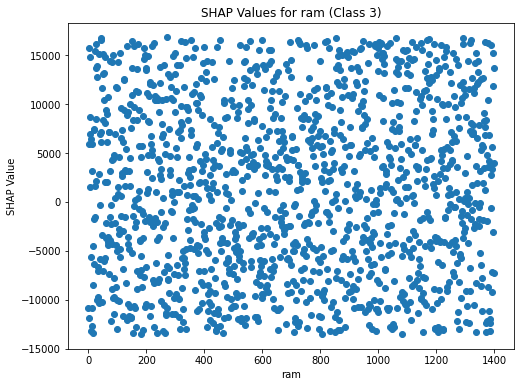

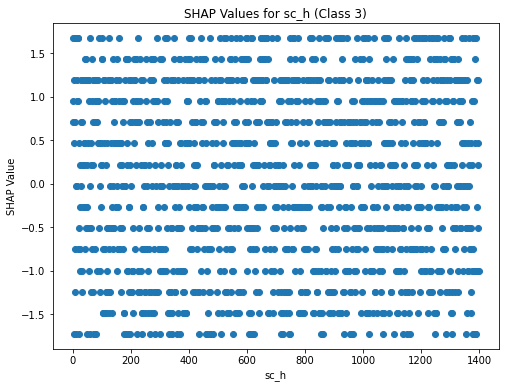

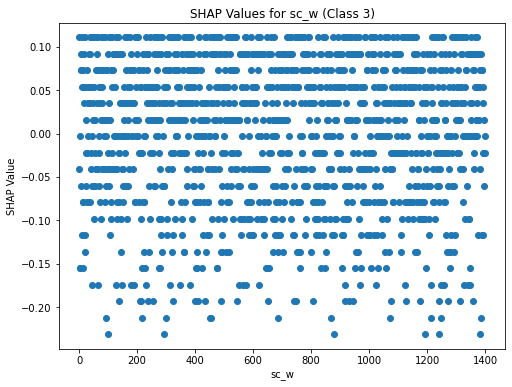

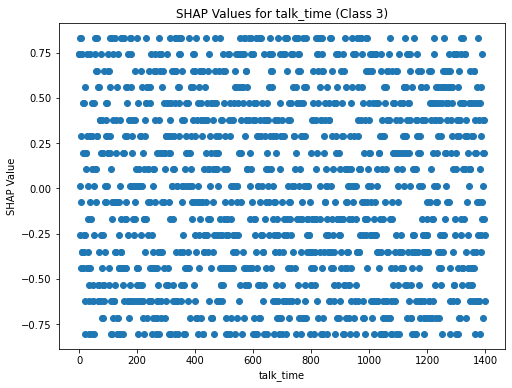

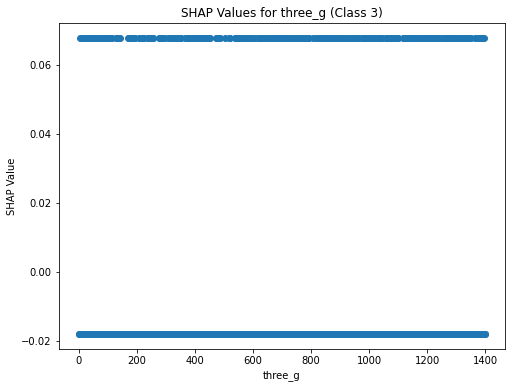

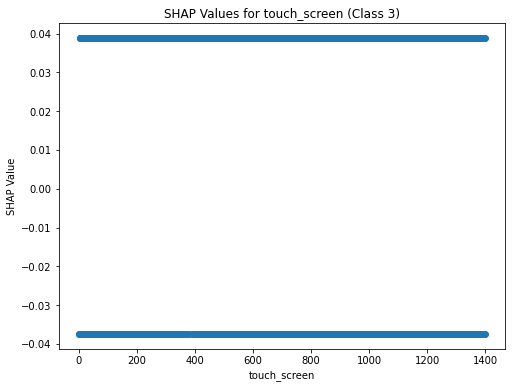

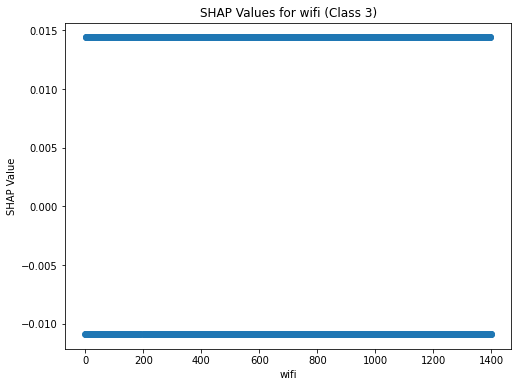

In [35]:
import matplotlib.pyplot as plt

# SHAP explanation of a Linear Model
linear_explainer = shap.LinearExplainer(logreg, X_train)
linear_shap_values = linear_explainer(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Choose the class index
class_index = 3

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), linear_shap_values.values[:, i, class_index])
    plt.xlabel(feature_name)
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()

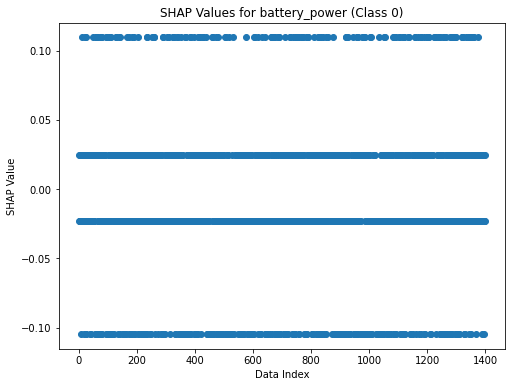

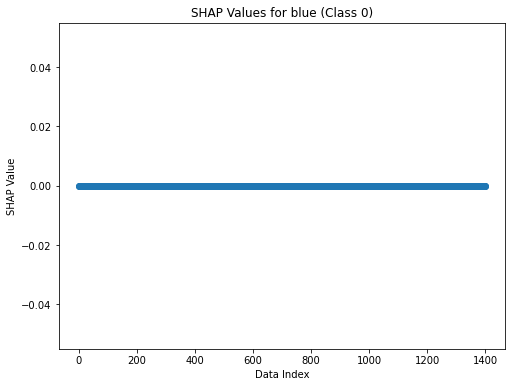

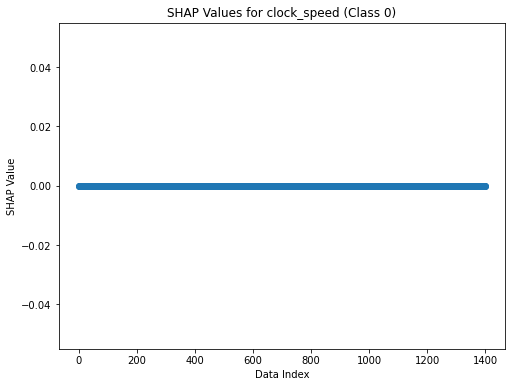

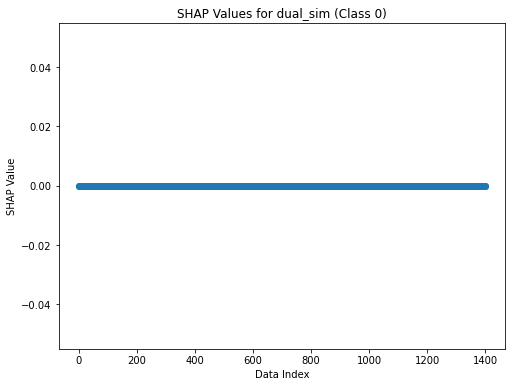

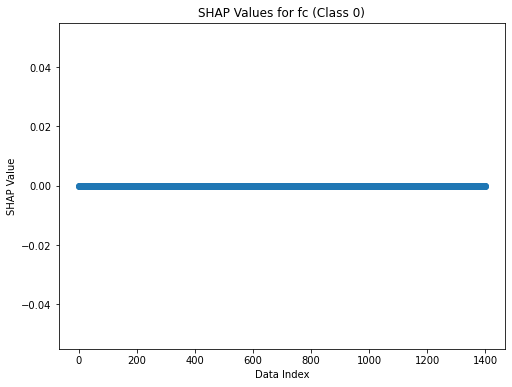

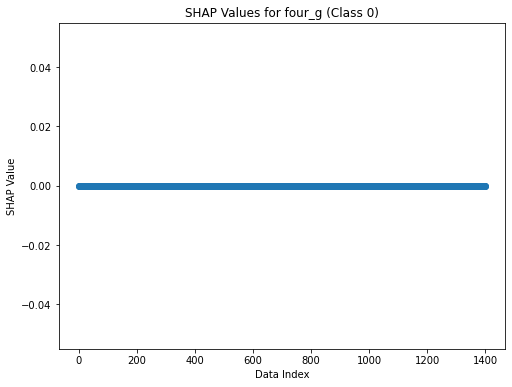

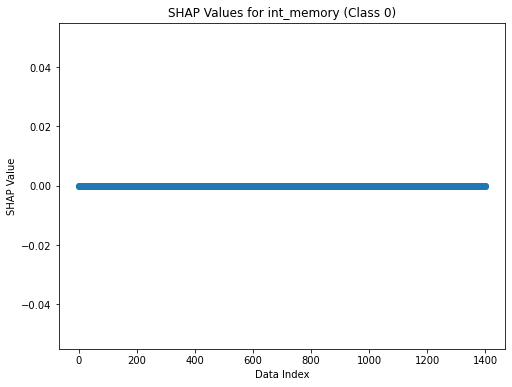

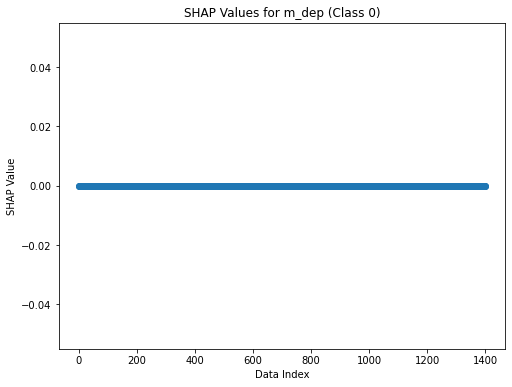

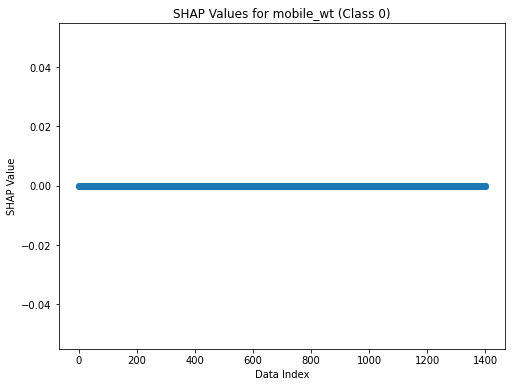

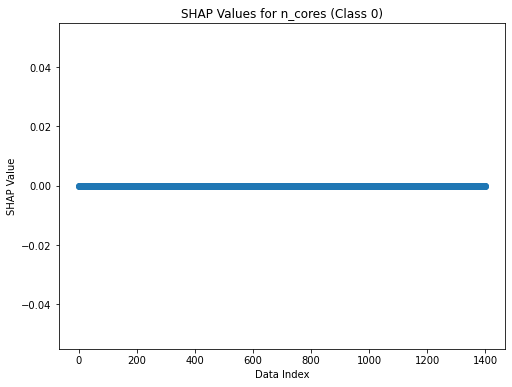

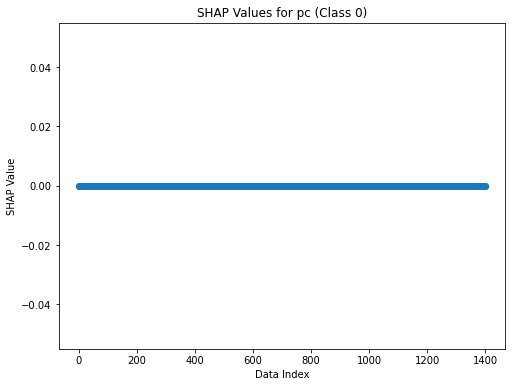

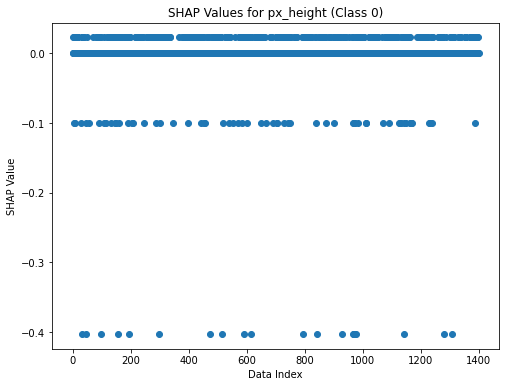

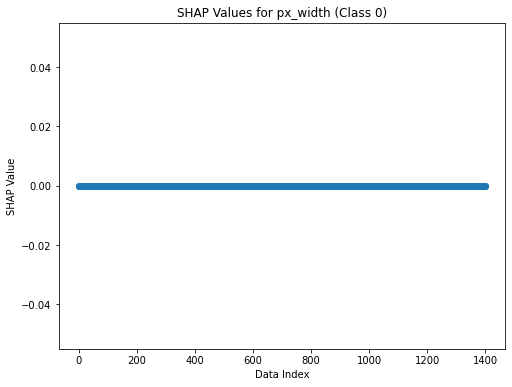

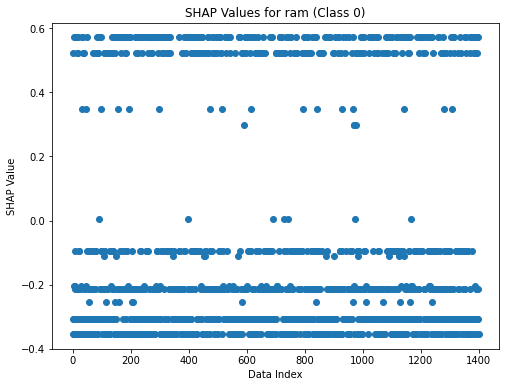

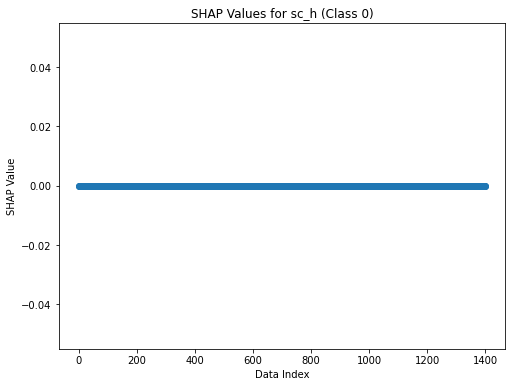

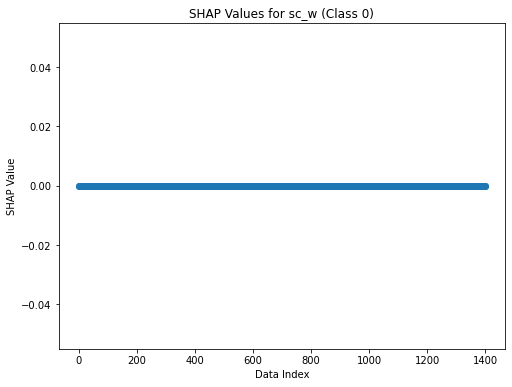

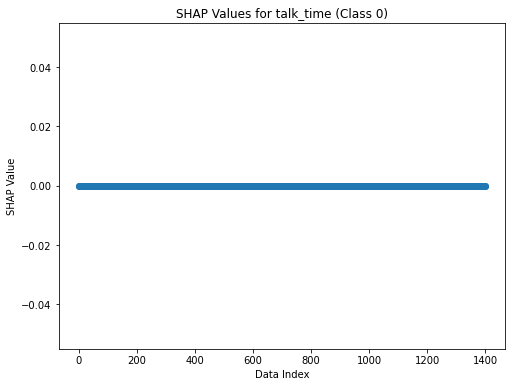

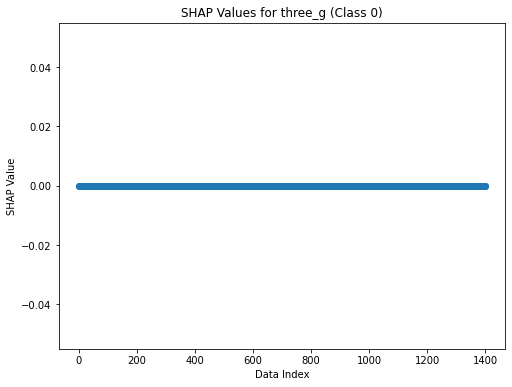

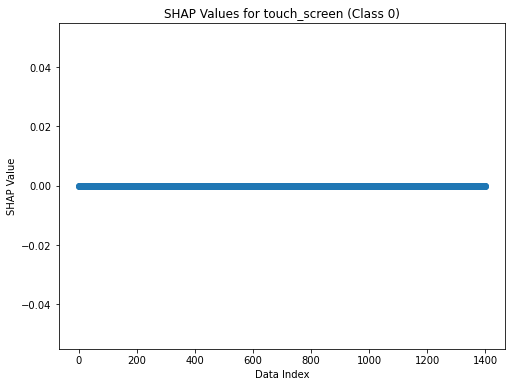

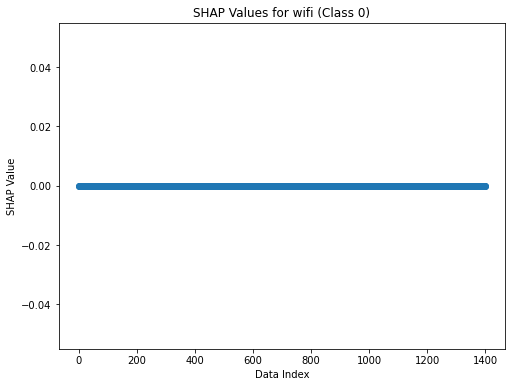

In [36]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# SHAP explanation of a tree-based model
tree_explainer = shap.TreeExplainer(dtc, X_train)
tree_shap_values = tree_explainer.shap_values(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Choose the class index (0 for the first class)
class_index = 0

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), tree_shap_values[class_index][:, i])
    plt.xlabel("Data Index")
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()


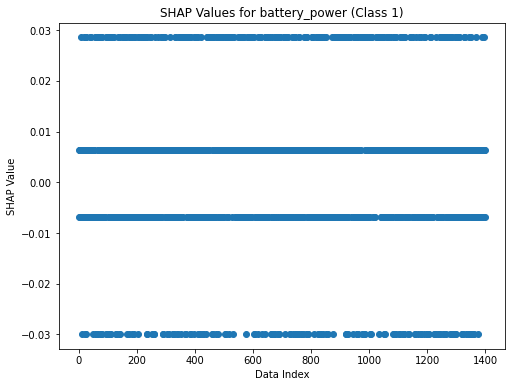

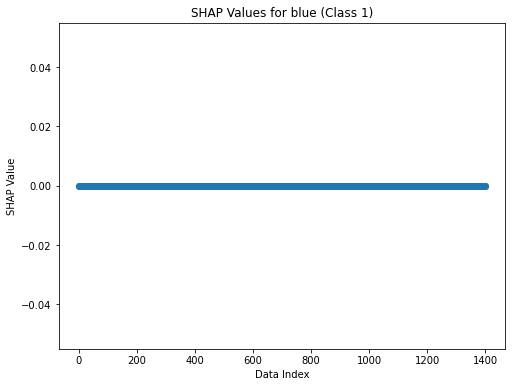

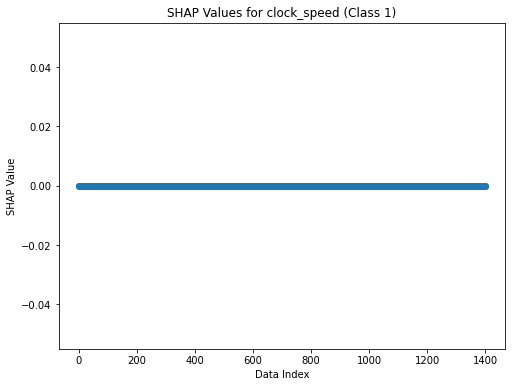

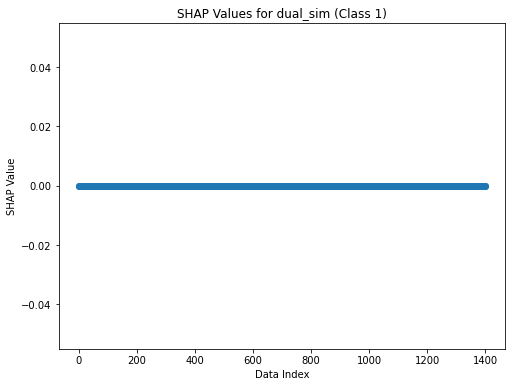

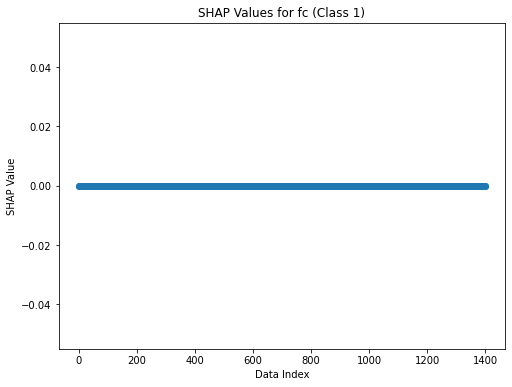

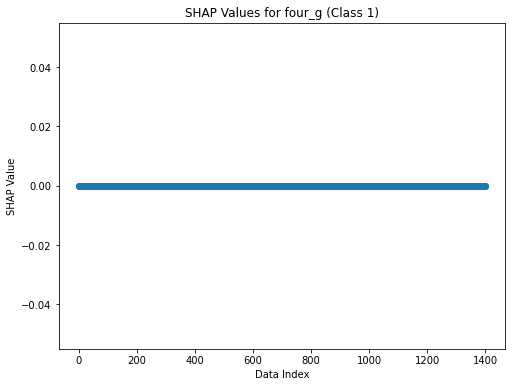

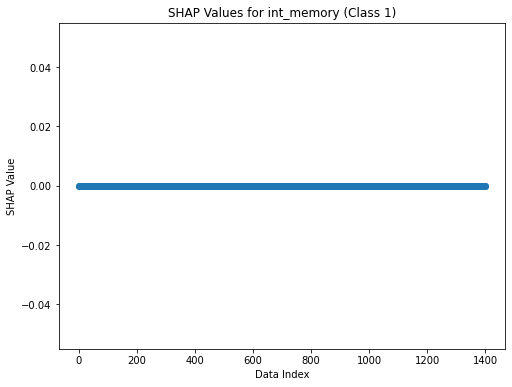

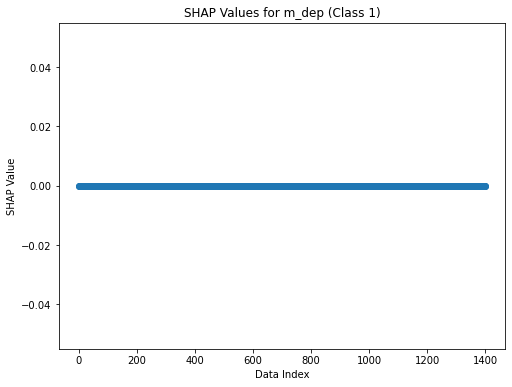

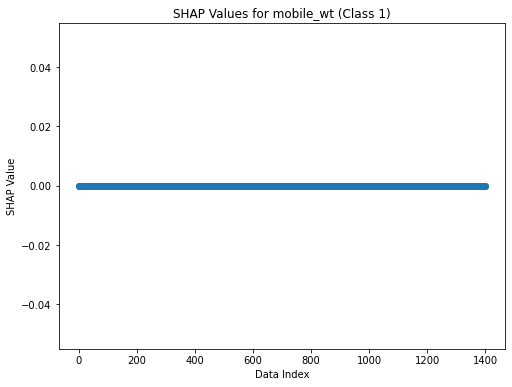

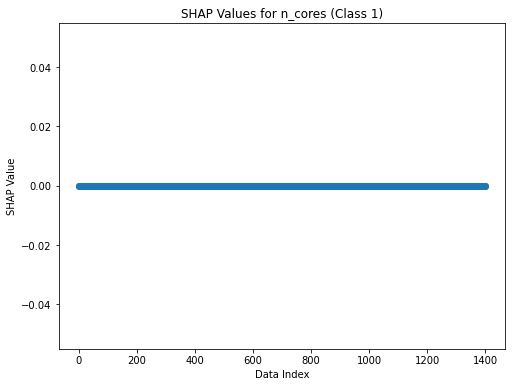

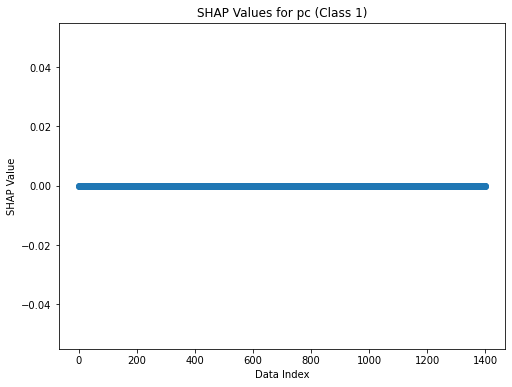

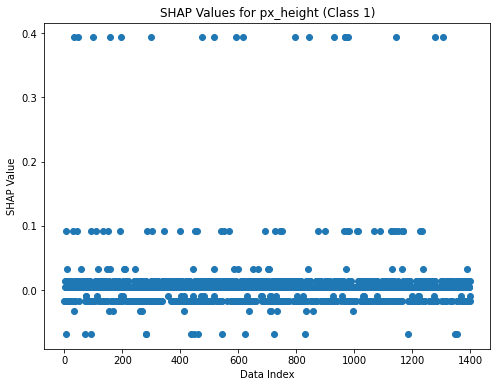

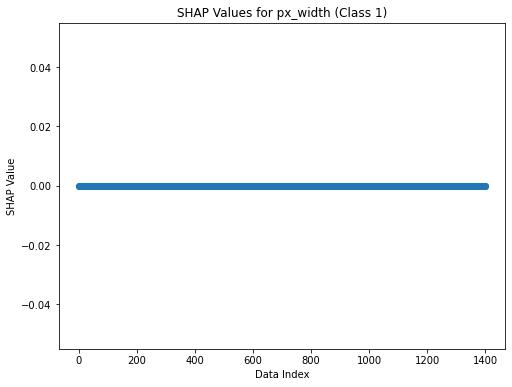

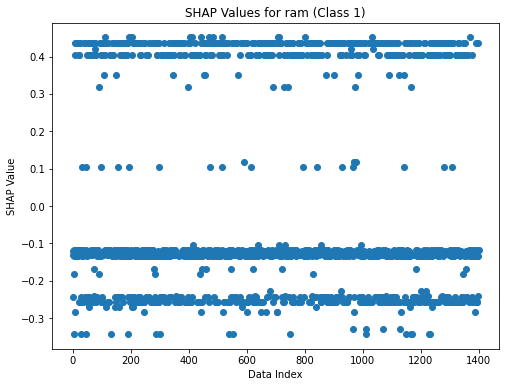

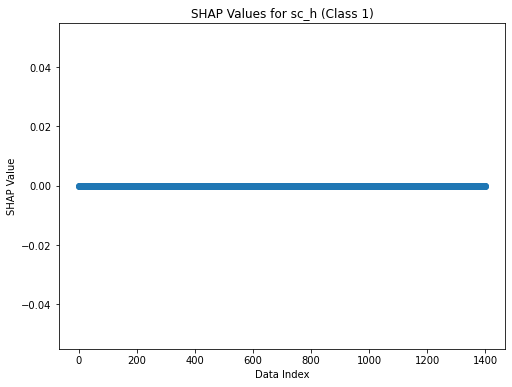

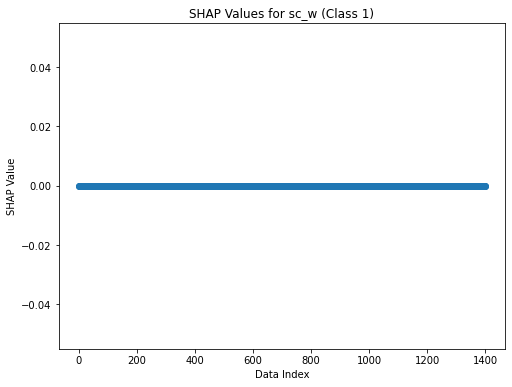

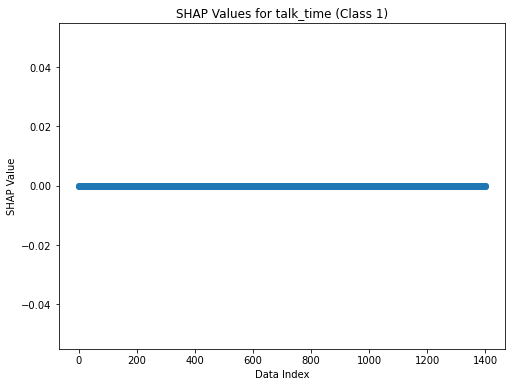

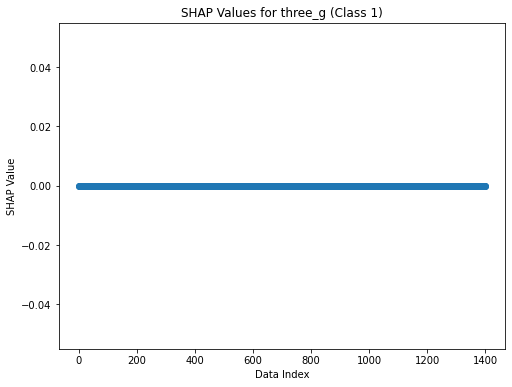

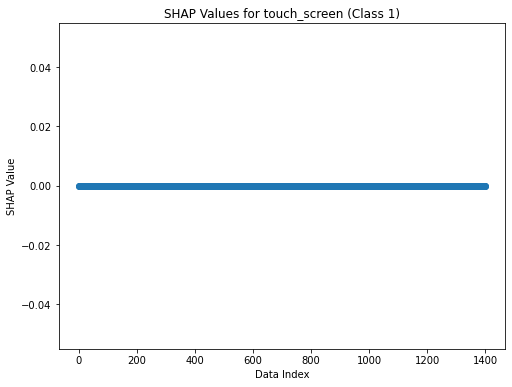

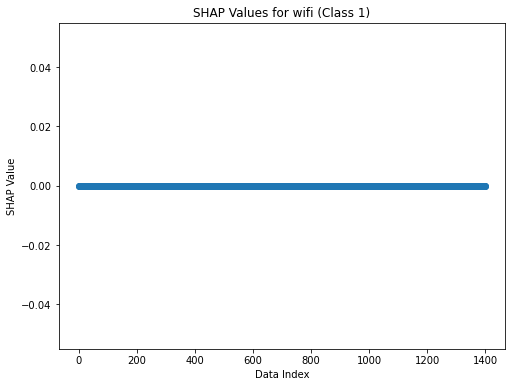

In [37]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# SHAP explanation of a tree-based model
tree_explainer = shap.TreeExplainer(dtc, X_train)
tree_shap_values = tree_explainer.shap_values(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Choose the class index
class_index = 1

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), tree_shap_values[class_index][:, i])
    plt.xlabel("Data Index")
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()

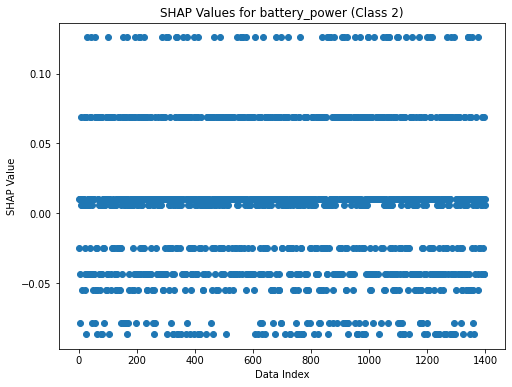

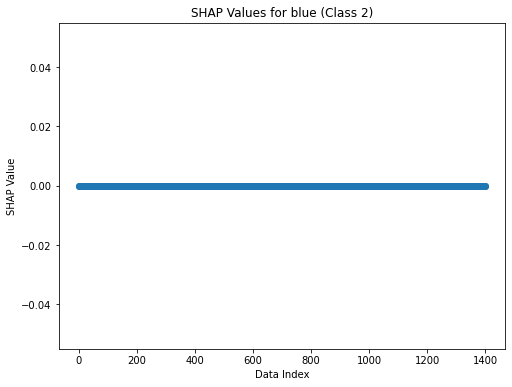

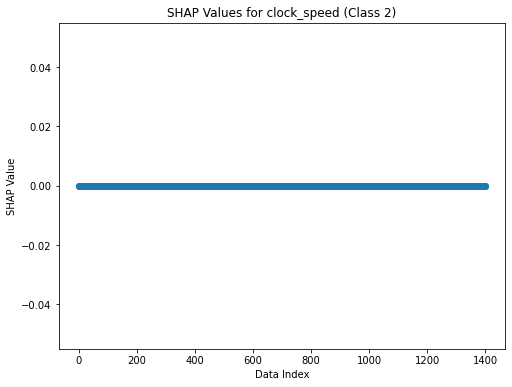

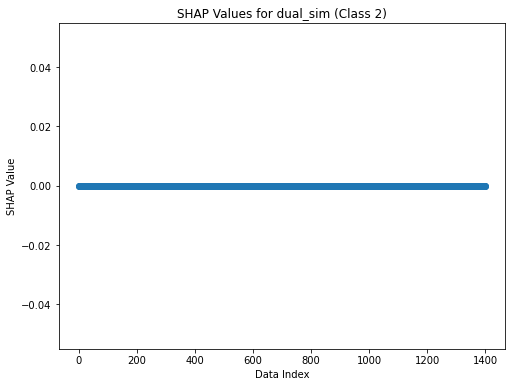

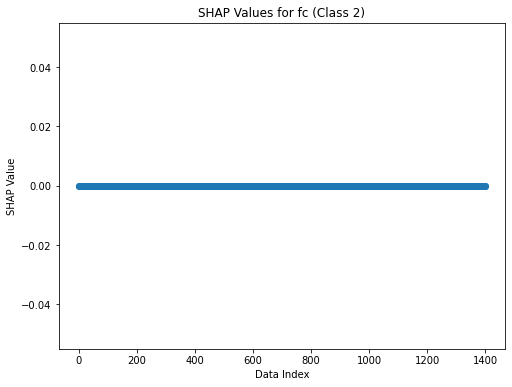

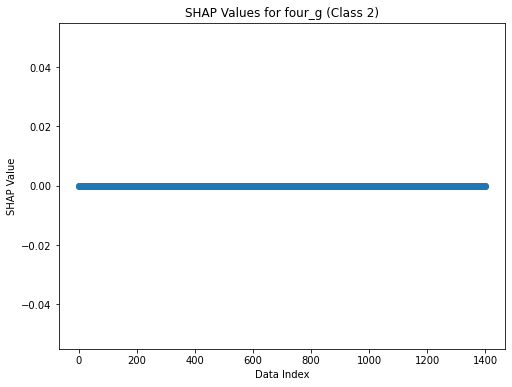

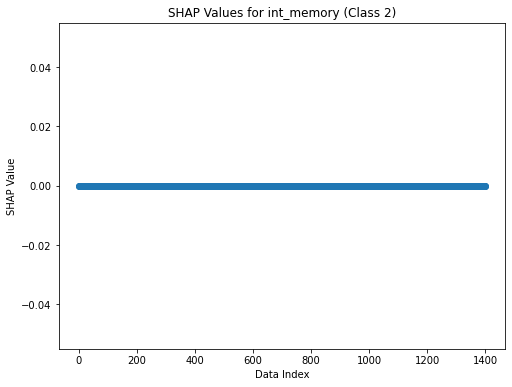

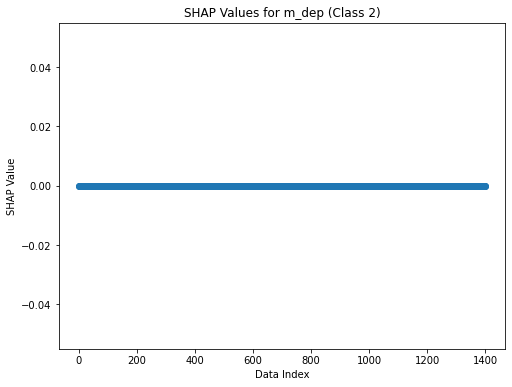

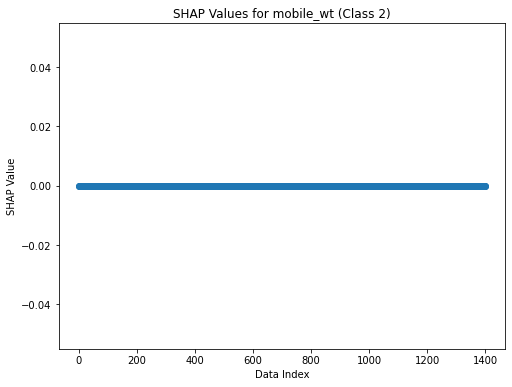

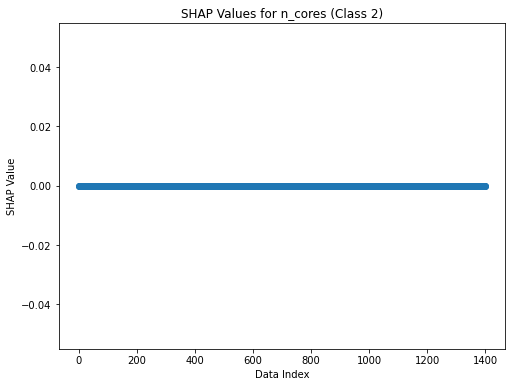

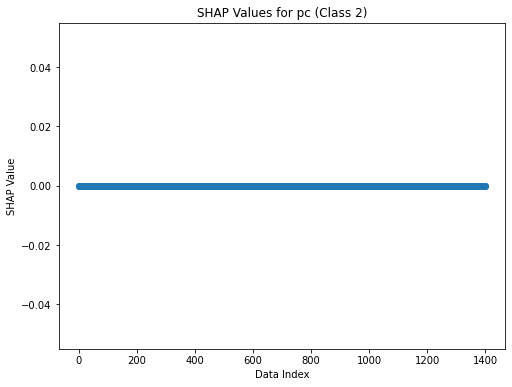

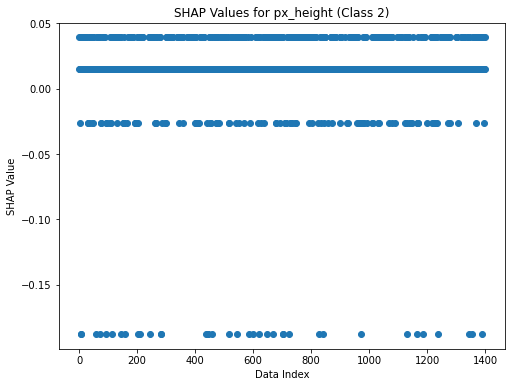

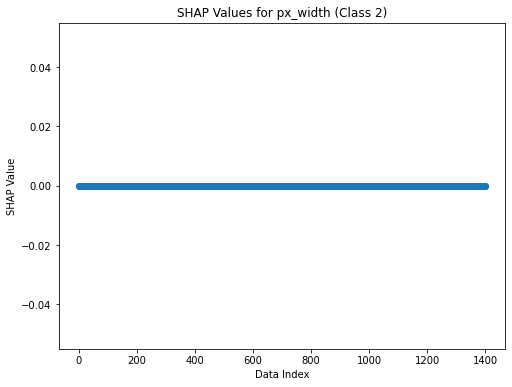

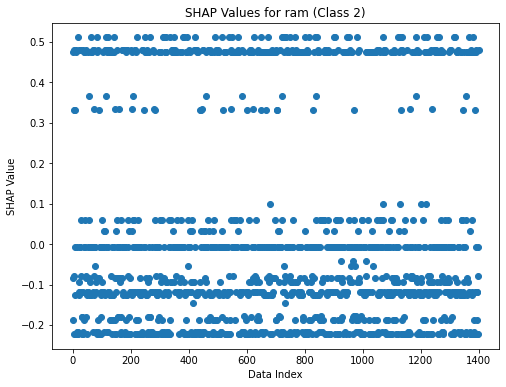

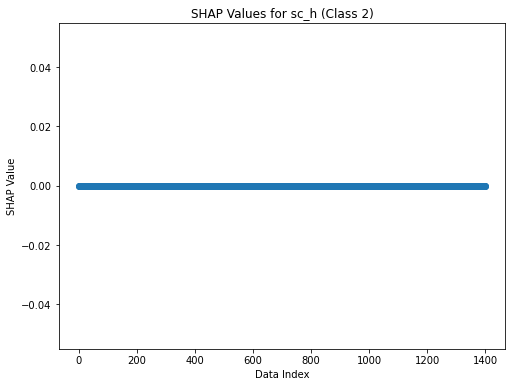

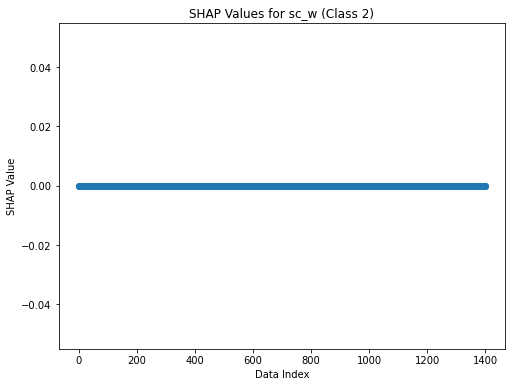

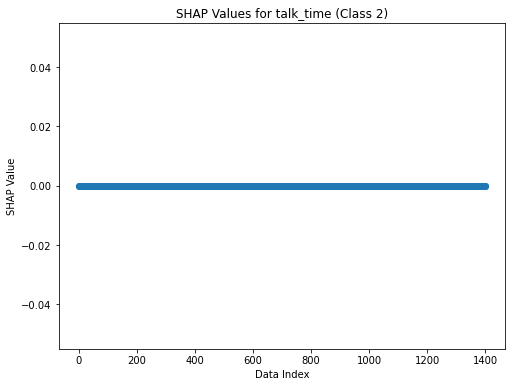

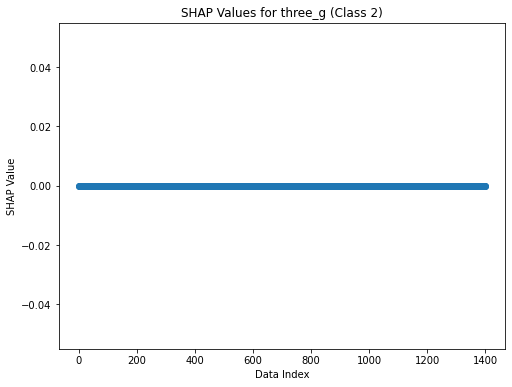

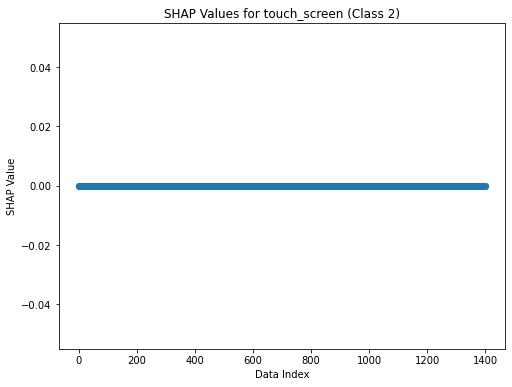

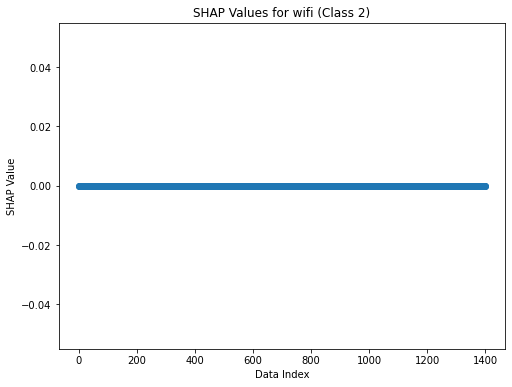

In [38]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# SHAP explanation of a tree-based model
tree_explainer = shap.TreeExplainer(dtc, X_train)
tree_shap_values = tree_explainer.shap_values(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Choose the class index
class_index = 2

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), tree_shap_values[class_index][:, i])
    plt.xlabel("Data Index")
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()

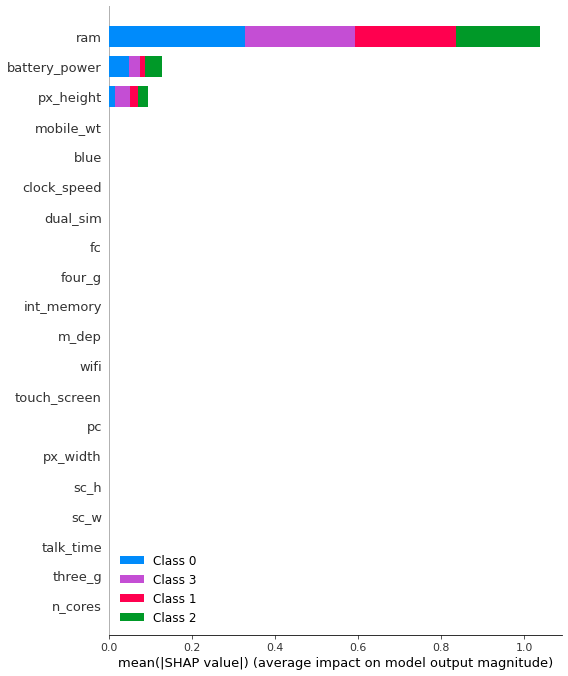

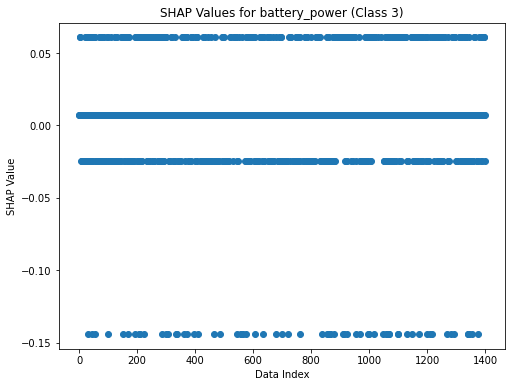

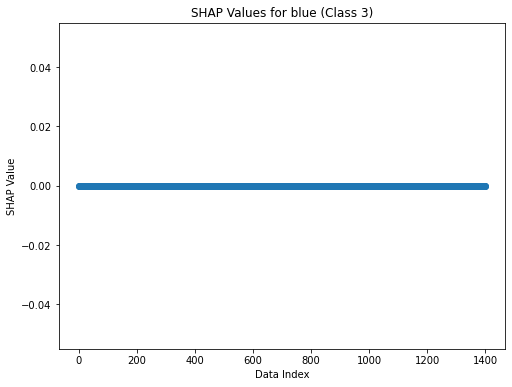

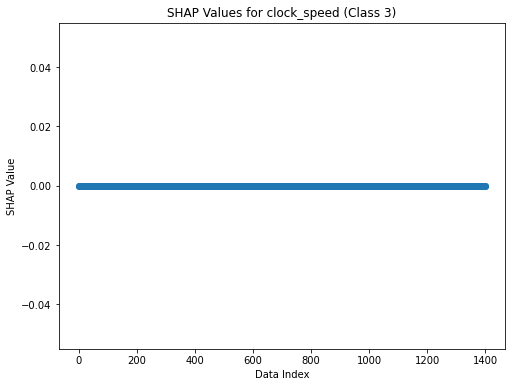

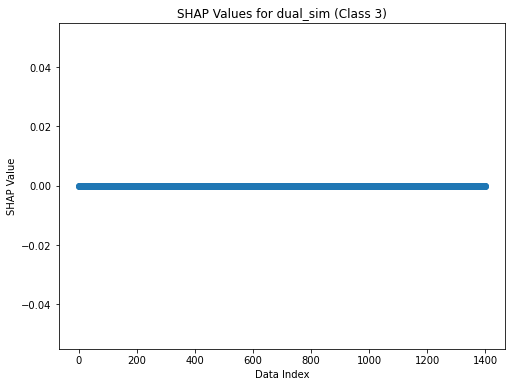

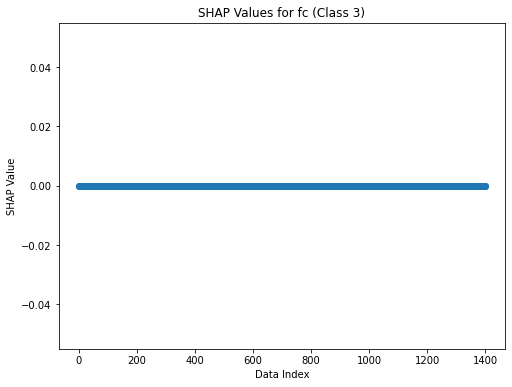

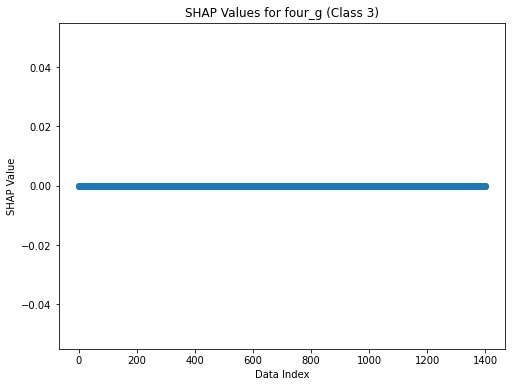

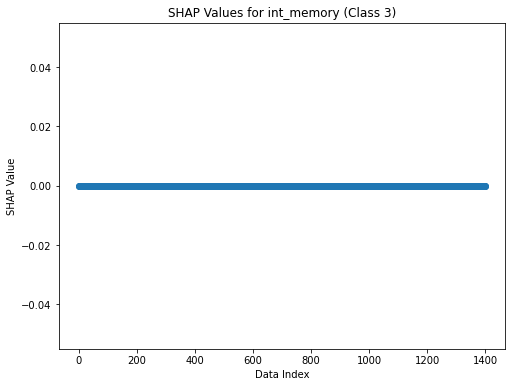

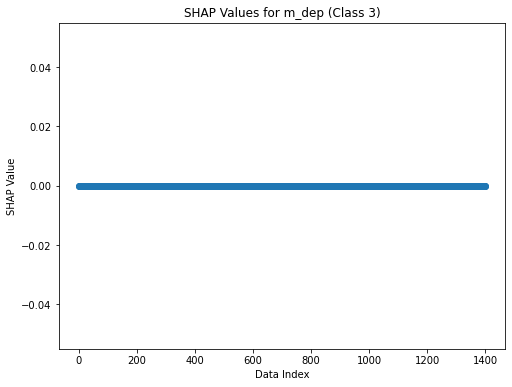

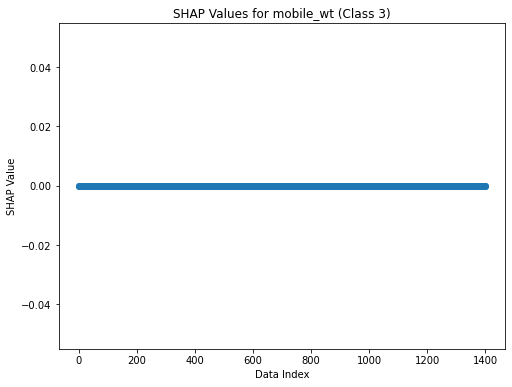

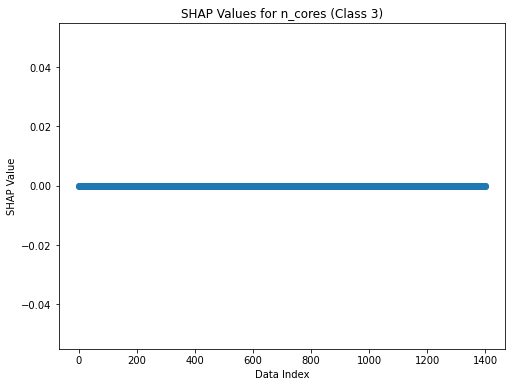

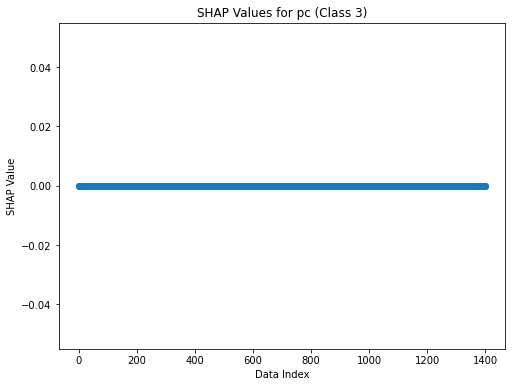

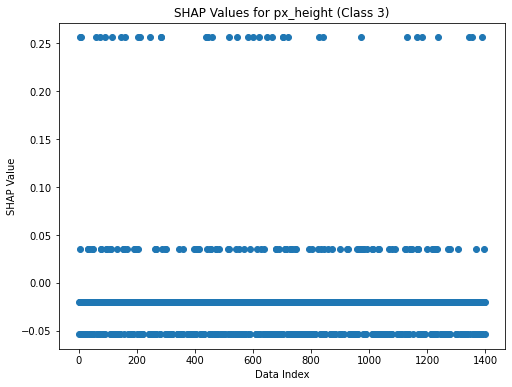

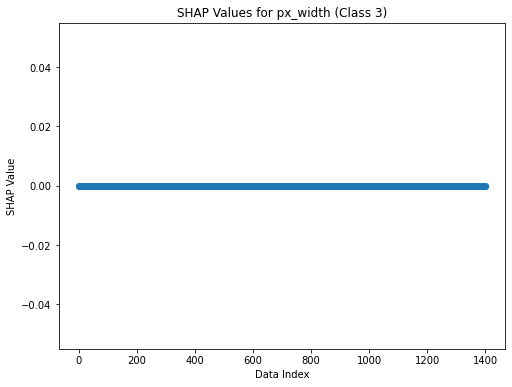

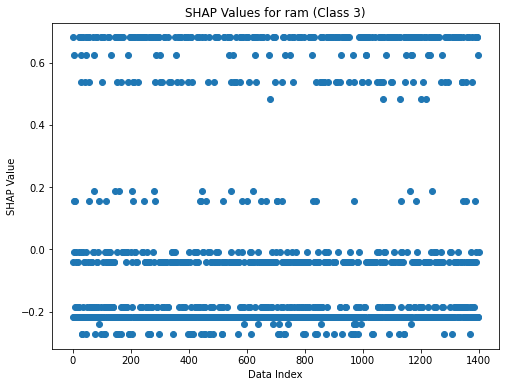

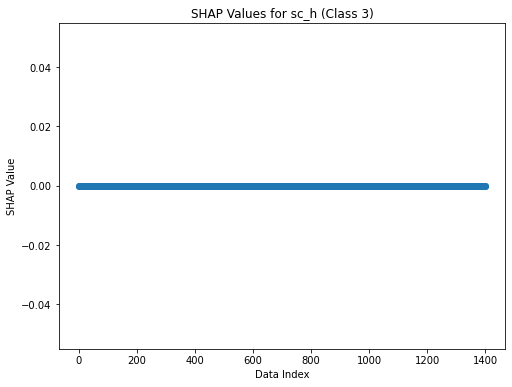

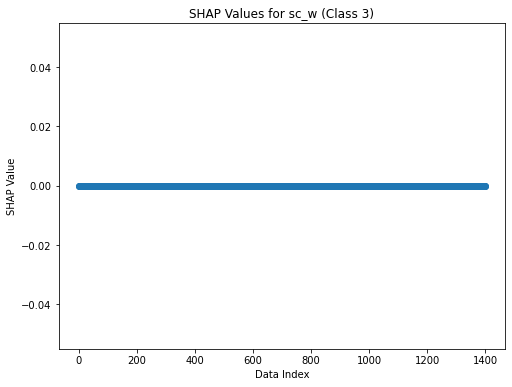

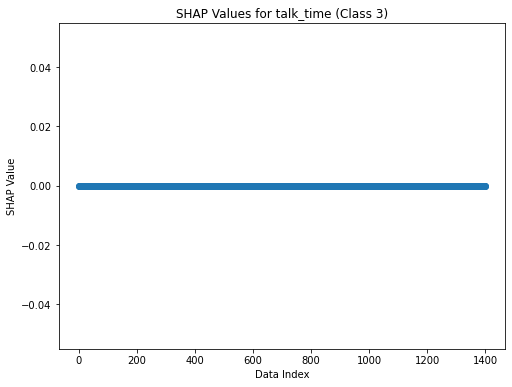

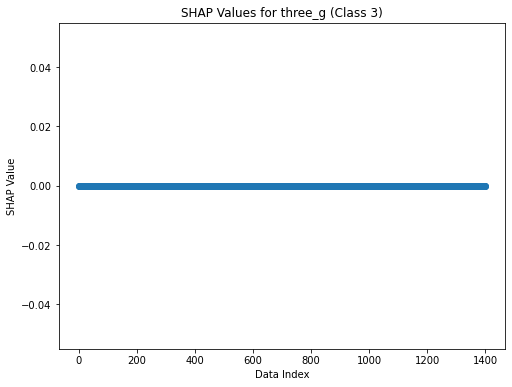

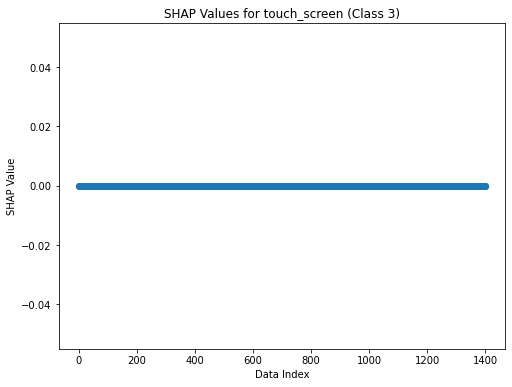

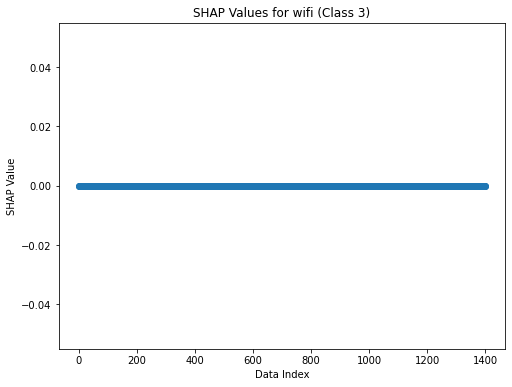

In [39]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# SHAP explanation of a tree-based model
tree_explainer = shap.TreeExplainer(dtc, X_train)
tree_shap_values = tree_explainer.shap_values(X_train)

# Convert the feature names to a NumPy array
feature_names = X_train.columns.to_numpy()

# Create a summary plot (Feature Importance Plot)
shap.summary_plot(tree_shap_values, X_train, feature_names=feature_names)

# Choose the class index
class_index = 3

# Create SHAP scatter plots for each feature for the chosen class
for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(X_train.shape[0]), tree_shap_values[class_index][:, i])
    plt.xlabel("Data Index")
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Values for {feature_name} (Class {class_index})")
    plt.show()

# SHAP Feature importance for linear and tree based models

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


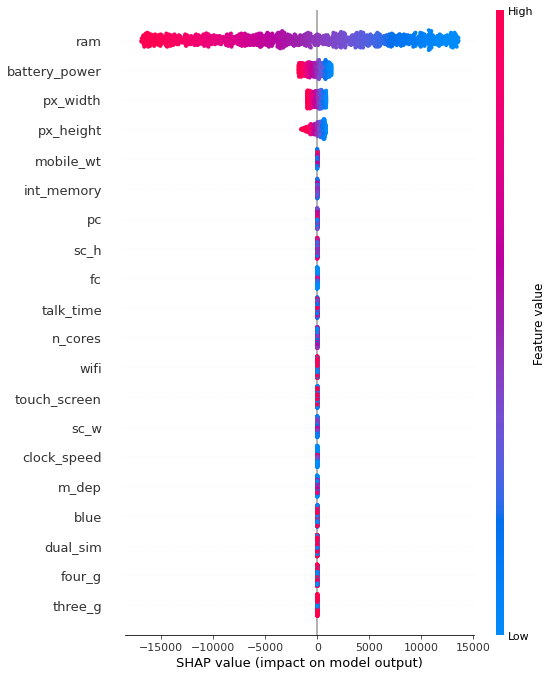

In [46]:
# Choose the class index (0 for the first class)
class_index = 0

# SHAP variable importance for a Linear Model for the chosen class
shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


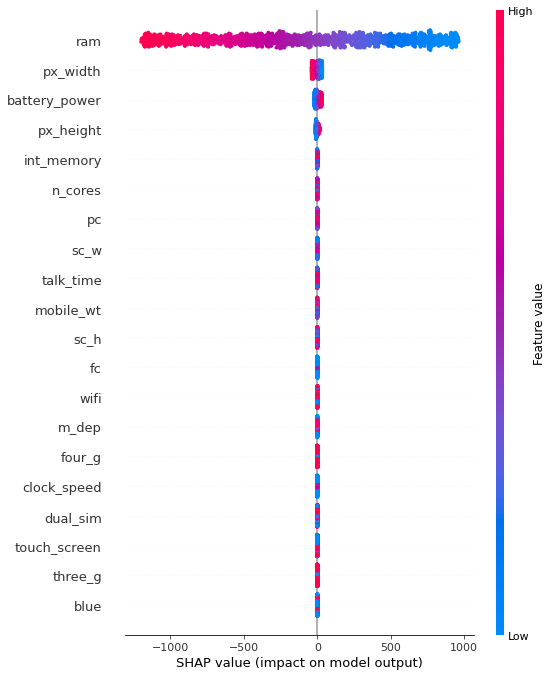

In [47]:
# Choose the class index
class_index = 1

# SHAP variable importance for a Linear Model for the chosen class
shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


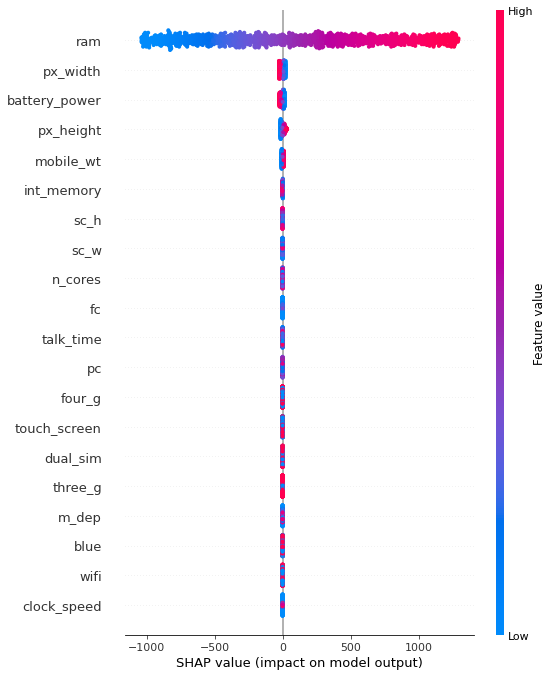

In [48]:
# Choose the class index
class_index = 2

# SHAP variable importance for a Linear Model for the chosen class
shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


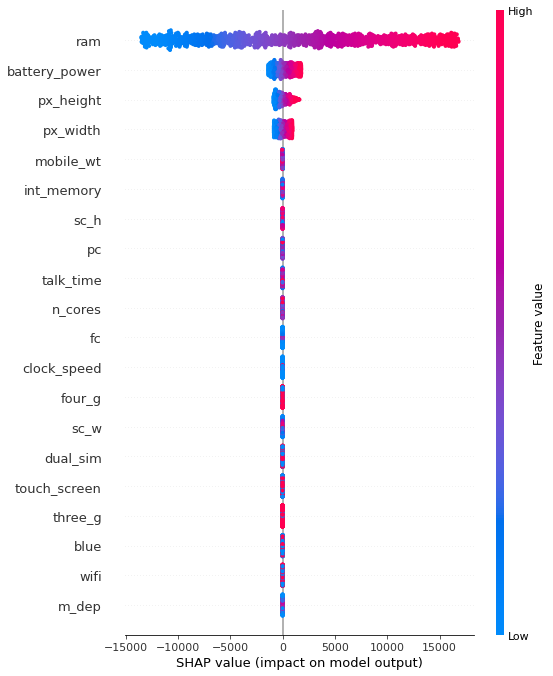

In [45]:
# Choose the class index
class_index = 3

# SHAP variable importance for a Linear Model for the chosen class
shap.summary_plot(linear_shap_values.values[:, :, class_index], X_train)

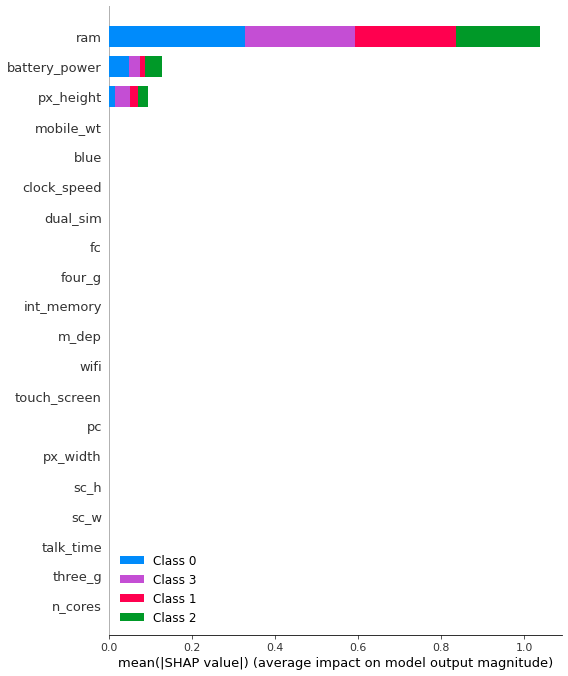

In [51]:
# Create SHAP summary plot for tree based model
shap.summary_plot(tree_shap_values, X_train)

**Linear Model Analysis**

Class 0: Looking at the SHAP values for the most significant features, we can see that they show a strong negative trend, i.e, their increase shows a decrease in the SHAP values and vice versa. It means that their increase will reduce the likelihood of this class.

Class 1: Looking at the SHAP values, we can see that ram and px_width show a negative trend, while battery_power and px_height show a somewhat positive trend. Which in this case  indicates that although the increase in ram and px_width values will still decrease the likelihood of this class, this time, the increase in battery_power and px_height will increase the likelihood of this class, even if by a little.

Class 2: In class 2, ram shows a strong positive trend, while px_height and mobile_wt show a little positive trend. battery_power and px_width still show negative trend. It means that the increase of the positive trend features will increase the likelihod of this class' occurence, the negative trend features' increase will decrease it.

Class 3: In class 3, all the significant features, namely ram, battery_power, px_width, and px_height show a very strong positive trend, which in this case, indicates that an increase in any one of their values will highly increase the likelihood of the occurence of this class.

**Tree Model Analysis**

As we can see from the bar plot above, the 3 features with the most significant impact on the shap values are ram, battery_power, and px_height. 

In the case of ram, the shap values show that the highest positive impact of ram is for class 2, and for class 1, a bit lower impact, and then for class 3 and 0 respectively. It means that the increase in ram means the highest probability of class 2, class 1, class 3, and class 0, in that order.

Same is the case for battery_power and px_height as well. The shap values show the most impact with their increase in the probability of class 2, class 1, class 3, and class 0, in that order.

The classes in question here are 0,1,2, and 3 of price_range.

# Partial Dependency, ICE, and SHAP plot comparison

LIME is more like SHAP but a lite version of it - It takes the local region of the point of interest and gives us information about the contribution each variable has made to the output

*   Partial Dependency Plot gives the response or effect a predictor variable has on the target by freezing the rest of the predictor variables

*   SHAP Plot tells us how much each variable contributes to the prediction of the target variable on the basis of most spread of Shapley values, with the most spread Shapley values belonging to the most important feature

*   ICE, or Individual Conditional Expectation Plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots. PDP shows the average effect of a feature while ICE plot shows the effect for a single instance, or in our case, for every 10 percentile from 0-100.




# References

1. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb 

2. https://colab.research.google.com/drive/1XsXEAEFan7O3wDlP5SDOXIcihkRuYkMr#scrollTo=FkQowG-QZAYO (My AutoML Assignment)

3. https://christophm.github.io/interpretable-ml-book/shap.html 

4. https://christophm.github.io/interpretable-ml-book/ice.html 


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright(c) 2023 Kumar Mehul

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.